# Описание данных

Данные - специально подготовленная выборка из полного набора, описанного здесь: https://mengtingwan.github.io/data/goodreads#datasets с дополнениями из https://www.kaggle.com/datasets/austinreese/goodreads-books:
- books: перечень книг (~44 тыс.) из списка https://www.goodreads.com/list/show/1.Best_Books_Ever (совпадение по book id),
- interactions: взаимодействие пользователей с книгами

Основной массив данных был собран в конце 2017.

# Инициализация

In [1]:
import logging

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.figure_format = 'retina'

Создаём логгер, который удобен для использования в ноутбуке.

# Load Data

Загружаем данные как они есть, начинаем на них смотреть: какие в них есть сущности, атрибуты, распределения.

In [3]:
books = pd.read_parquet("./goodsread/books.parquet")

In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43312 entries, 3 to 2360448
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   book_id               43312 non-null  int64  
 1   author                43312 non-null  object 
 2   title                 43312 non-null  object 
 3   description           43312 non-null  object 
 4   genre_and_votes       43312 non-null  object 
 5   num_pages             37001 non-null  Int64  
 6   average_rating        43312 non-null  float64
 7   ratings_count         43312 non-null  Int64  
 8   text_reviews_count    43312 non-null  int64  
 9   publisher             43312 non-null  object 
 10  publication_year      35891 non-null  Int64  
 11  country_code          43312 non-null  object 
 12  language_code         43312 non-null  object 
 13  format                43312 non-null  object 
 14  is_ebook              43312 non-null  bool   
 15  isbn                  

Пример данных по книгам

In [5]:
(
    books[["book_id", "author", "title", "num_pages", "average_rating"]]
    .sample(5, random_state=52)
    .sort_values("book_id")
    .set_index("book_id")
)

,author,title,num_pages,average_rating
book_id,,,,
69882,"Heinrich Böll, Patrick Bowles",Billiards at Half-Past Nine,288,3.93
267533,Robert Cormier,8 Plus 1,173,3.67
820966,"Martin Luther, J.I. Packer, O.R. Johnston",The Bondage of the Will,322,4.17
4532622,Karen Hancock,The Enclave,492,3.82
20444381,Diana Gabaldon,Os tambores de outono - 1ª Parte (Outlander #4),1048,3.99


In [6]:
interactions = pd.read_parquet("./goodsread/interactions.parquet")

Можно оценить объём данных о взаимодействиях

In [7]:
interactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12890434 entries, 0 to 12914458
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      object
 1   book_id      int64 
 2   started_at   object
 3   read_at      object
 4   is_read      bool  
 5   rating       int64 
 6   is_reviewed  bool  
dtypes: bool(2), int64(2), object(3)
memory usage: 614.7+ MB


Пример данных по взаимодействиям

In [8]:
(
    interactions[["user_id", "book_id", "started_at", "read_at", "is_read", "rating"]]
    .sample(5, random_state=52)
    .sort_values("user_id")
    .set_index(["user_id", "book_id"])
)

,,started_at,read_at,is_read,rating
user_id,book_id,,,,
0447747f44c0d8d1a08cf329fe253f29,10054335,2016-04-08,2016-04-20,True,3
14432756ffba6357686f09e4ccc332bb,26252859,2016-05-27,2016-05-30,True,5
46d6c8cf548d1c86abb671f42ba71b5e,960,2014-08-06,2016-10-29,True,5
71c2b3714945af1f700f49953904c510,18492859,2014-10-09,2014-10-12,True,5
7802bafdeac8abff23a72b9dd60b1dd1,18710190,2015-03-01,2015-05-05,True,4


# Факультативное задание

- количество пользователей,
- среднее количество прочитанных книг на пользователя,
- долю прочитанных книг, у которых нет рейтинга,
- распределение рейтинга,
- распределение популярности (долю пользователей, приходящуюся на одну книгу),
- распределение количества взаимодействий во времени,
- есть ли какие-то логические нестыковки и странности в данных.

In [9]:
# количество пользователей
interactions.user_id.nunique()

542657

In [10]:
interactions.shape

(12890434, 7)

In [11]:
# среднее количество прочитанных книг на пользователя
interactions.groupby(by='user_id')['book_id'].count().mean()

23.7542941489744

In [12]:
interactions.groupby(by='user_id').agg(count=("book_id", "count")).mean()

count    23.754294
dtype: float64

In [13]:
# долю прочитанных книг, у которых нет рейтинга
print(
    round(interactions.query('rating == 0').shape[0] / interactions.shape[0], 2)
)

0.08


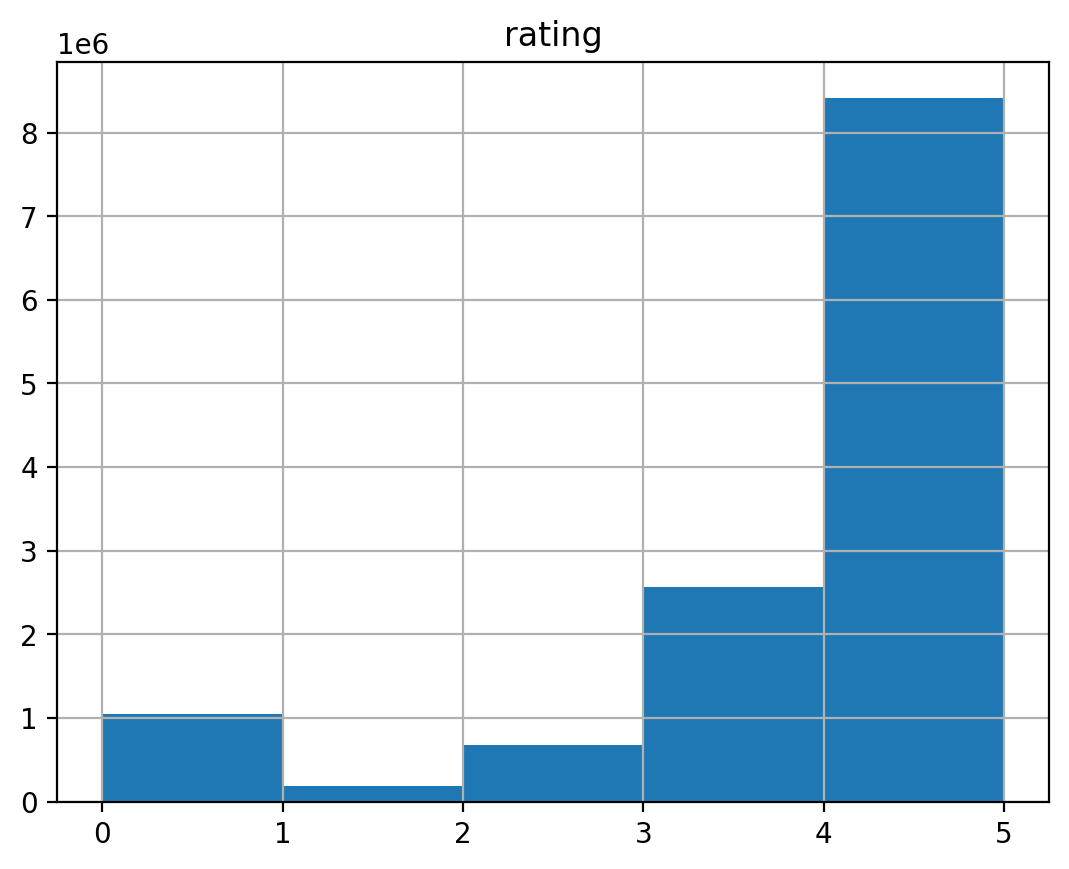

In [14]:
# распределение рейтинга
interactions.hist('rating', bins=5);

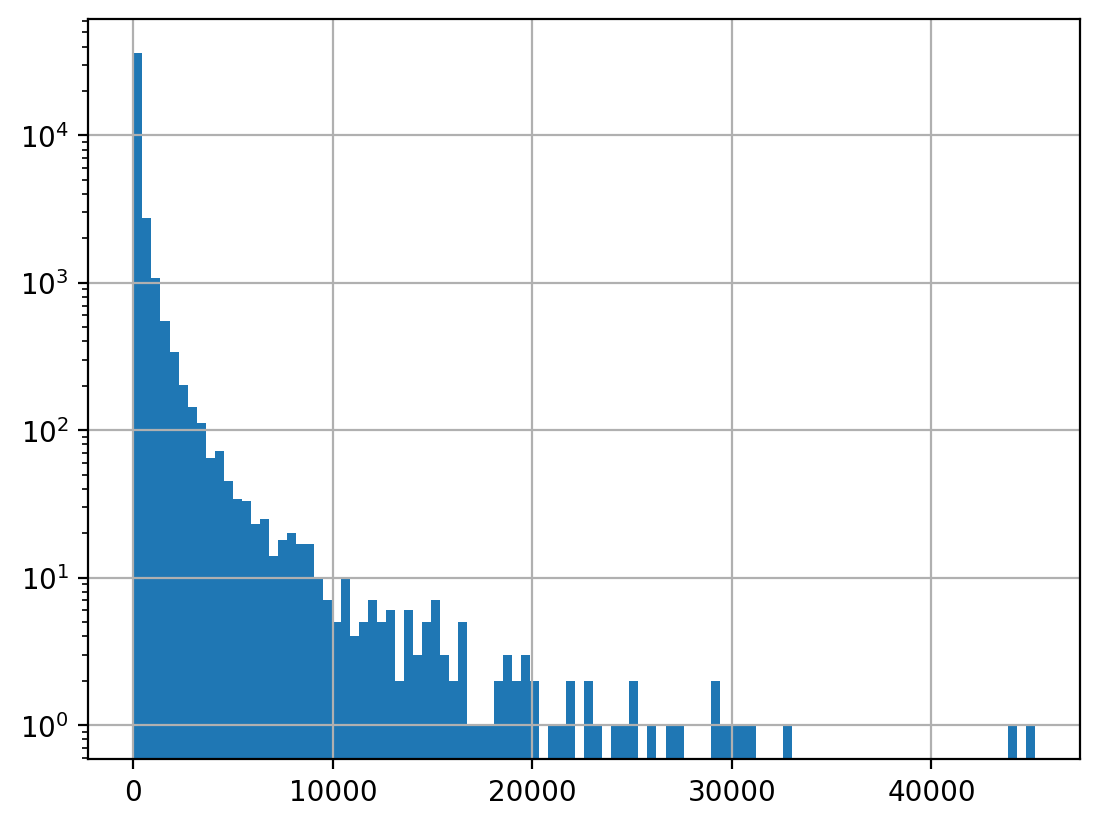

In [15]:
# распределение популярности (долю пользователей, приходящуюся на одну книгу)
interactions.groupby(by='book_id')['user_id'].count().hist(bins=100, log=True);

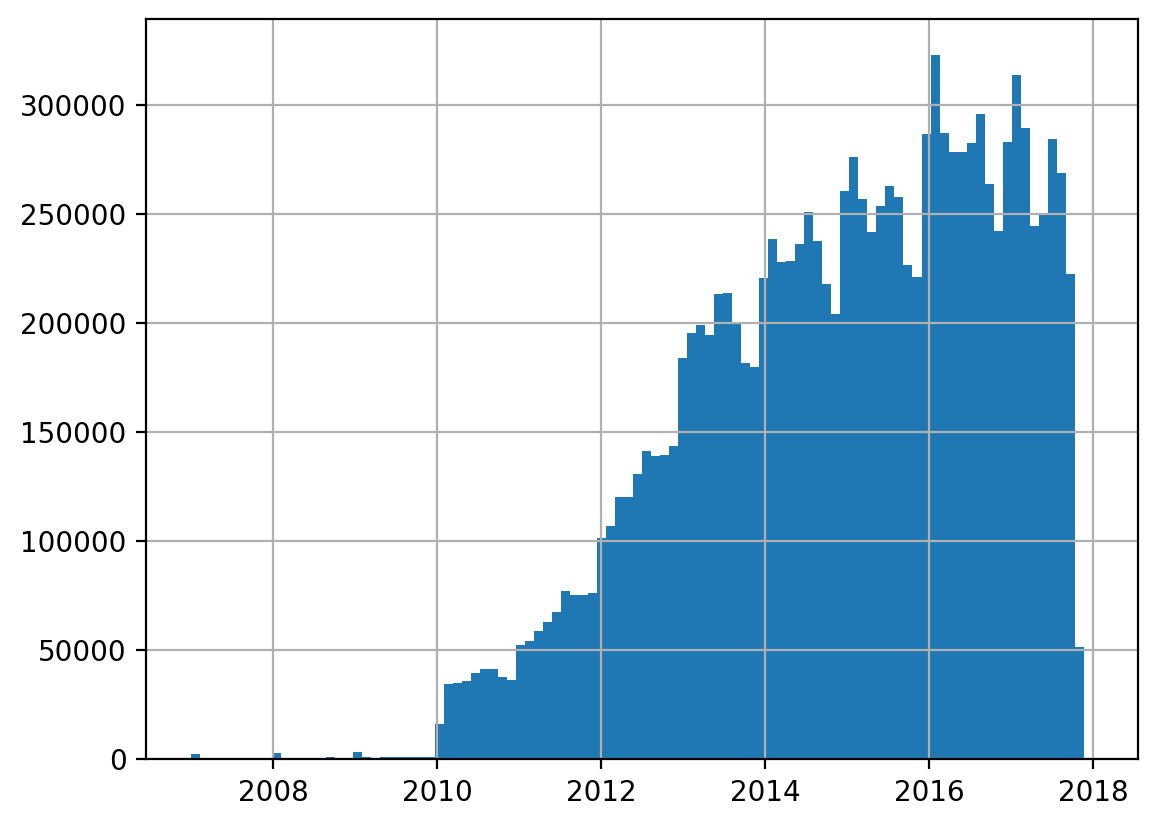

In [16]:
# распределение количества взаимодействий во времени
interactions['started_at'] = pd.to_datetime(interactions.started_at)
interactions['read_at'] = pd.to_datetime(interactions.read_at)
interactions['started_at'].hist(bins=100);

# EDA

Посмотрим на данные о книгах, какие поля есть.

In [17]:
books.sample(3).T

,66344,433902,275904
book_id,2635498,10793020,36233827
author,"Michael Dante DiMartino, Bryan Konietzko",M.J. Hearle,Jodi Ellen Malpas
title,Avatar Volume 2: The Last Airbender (Avatar #2),"Winter's Shadow (Winter Saga, #1)","With This Man (This Man, #4)"
description,Aang must face his destiny as he fights for th...,Blake Duchamp...\nHe's all that Winter Adams c...,Jesse Ward is back in the newest novel in the ...
genre_and_votes,"{'Sequential Art-Graphic Novels': 22, 'Sequent...","{'Fantasy-Paranormal': 75, 'Young Adult': 71, ...","{'Romance': 104, 'Romance-Contemporary Romance..."
num_pages,<NA>,424,<NA>
average_rating,4.48,3.68,4.88
ratings_count,607,1549,37
text_reviews_count,13,192,33
publisher,,Pan Macmillan Australia,


Посмотрим на данные о взаимодействиях пользователей с книгами.

In [18]:
books["book_id"].nunique()

43312

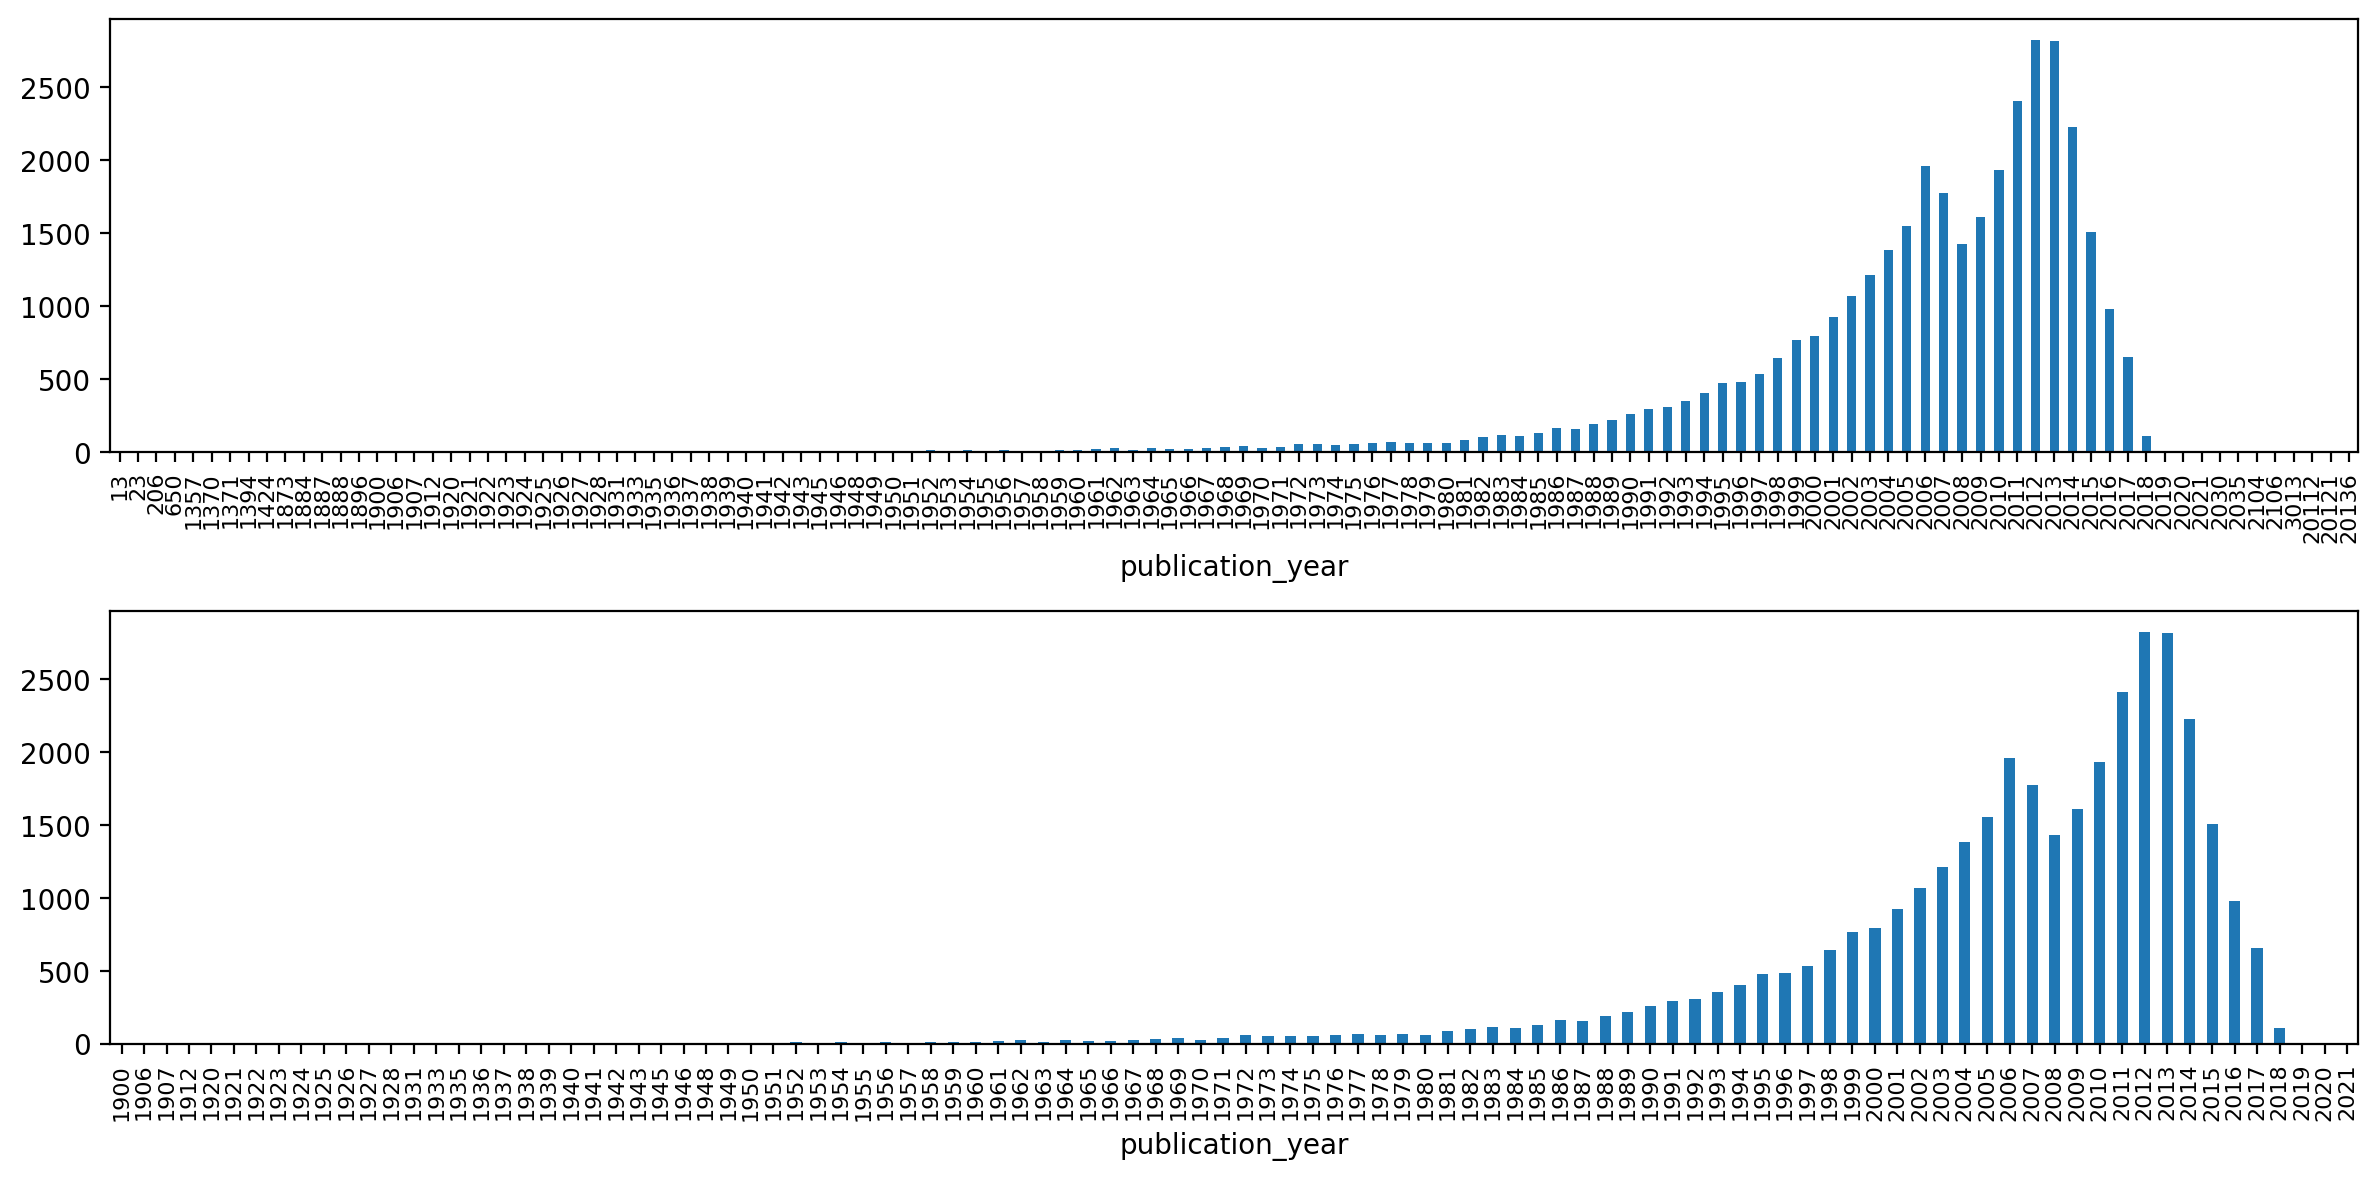

In [19]:
# распределение книг по годам публикации

fig, axs = plt.subplots(2, 1, figsize=(12, 6))

ax = axs[0]
books["publication_year"].value_counts().sort_index().plot(kind="bar", ax=ax)
ax.tick_params(axis='x', labelsize=8)

ax = axs[1]
books.query("publication_year >= 1900 and publication_year <= 2025")["publication_year"].value_counts().sort_index().plot(kind="bar", ax=ax)
ax.tick_params(axis='x', labelsize=8)

fig.tight_layout()

# События по месяцам

In [20]:
from pandas.tseries.offsets import MonthEnd

interactions["started_at_month"] = (
    pd.to_datetime(interactions["started_at"])
    .dt.to_period('M')
    .dt.to_timestamp()
    .dt.date
)

In [21]:
interactions_by_month = (
    interactions
    .groupby("started_at_month")
    .agg(events=("started_at", "count"), users=("user_id", "nunique"))
    .reset_index()
)

In [22]:
interactions_by_month

,started_at_month,events,users
0,2007-01-01,1993,1071
1,2007-02-01,201,135
2,2007-03-01,222,152
3,2007-04-01,201,135
4,2007-05-01,204,138
...,...,...,...
127,2017-08-01,202129,93040
128,2017-09-01,172187,82694
129,2017-10-01,108107,58076
130,2017-11-01,565,475


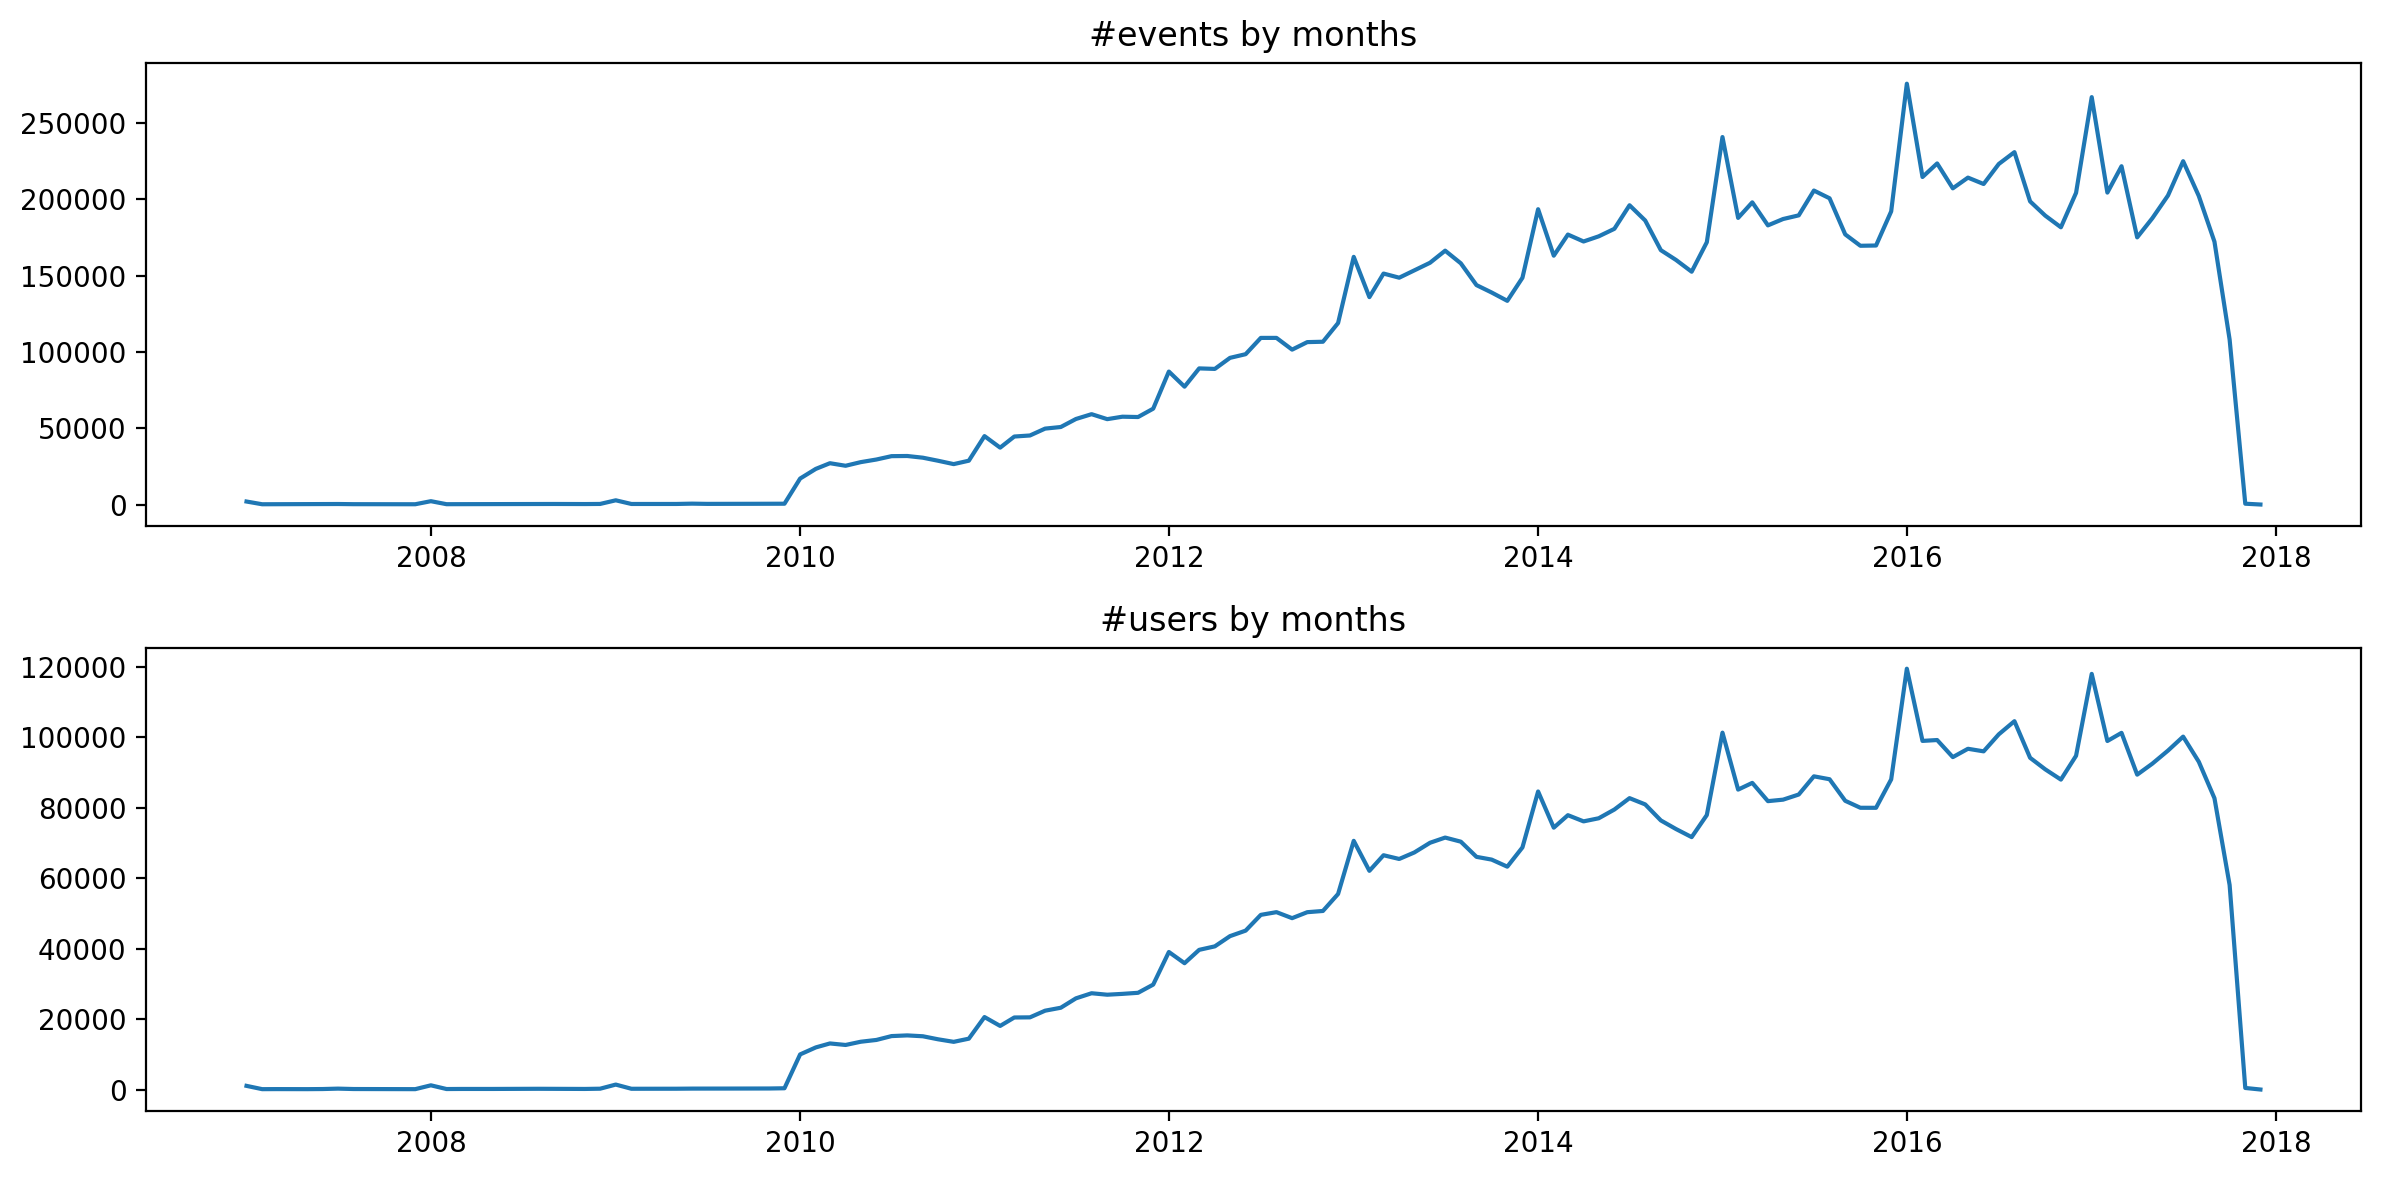

In [23]:
# распределение взаимодействий по годам

fig, axs = plt.subplots(2, 1, figsize=(12, 6))

ax = axs[0]
ax.plot(interactions_by_month["started_at_month"], interactions_by_month["events"])
# ax.tick_params(axis='x', labelsize=8)
ax.set_title("#events by months")

ax = axs[1]
ax.plot(interactions_by_month["started_at_month"], interactions_by_month["users"])
# ax.tick_params(axis='x', labelsize=8)
ax.set_title("#users by months")

fig.tight_layout()

# Преобработка

Примем новые именования:
- books -> items (более обобщённое название)
- interactions -> events (несколько короче, удобнее в коде)

In [24]:
items = books.rename(columns={'book_id': 'item_id'}).copy()
events = interactions.rename(columns={'book_id': 'item_id'}).copy()

In [25]:
del books
del interactions

In [26]:
# оставим события только до ноября 2017

event_cutoff_date = pd.to_datetime("2017-11-01").date()
events = events.query("started_at < @event_cutoff_date and read_at < @event_cutoff_date").copy()

# Ваш код здесь

## Задание 1 из 6

In [27]:
# удалите события, для которых нет рейтинга
events = events.query('rating > 0')

In [28]:
# оставьте события только c признаком is_read=True
events = events.query('is_read == True')

In [29]:
# оставьте только тех пользователей, у которых две прочитанные книги и более.
users = events.groupby("user_id").agg(count=("is_read", "sum"))
users = list(users[users['count'] >= 2].index)
events = events.query('user_id in @users')

перекодируйте идентификаторы пользователей из символьного вида (92f960b6da4be49c7955794c6331d759) в числовой. Все оставшиеся после обработки данных идентификаторы нужно отсортировать по возрастанию и последовательно пронумеровать, начиная с 1 000 000. Эти значения и будут новыми идентификаторами пользователей.

In [30]:
events['user_id'] = events['user_id'].apply(lambda x: int(x, 16))

In [31]:
new_user_id = {
    old_id: int(1e6 + new_id) for new_id, old_id
    in enumerate(np.sort(events.user_id.unique()))
}

In [32]:
events['user_id'] = events['user_id'].map(new_user_id)

In [33]:
# Какая доля событий осталась после обработки данных?
events.shape[0] / 12890434

0.9116129061286843

# Сохранение результатов

In [34]:
items.to_parquet("items.par")

In [35]:
events.to_parquet("events.par")

In [36]:
!ls

als_recommendations.parquet  items.par		  README.md
events.par		     main_offline.ipynb   requirements.txt
goodsread		     preprocessing.ipynb  venv


In [37]:
# Какой новый идентификатор у пользователя с изначальным идентификатором
# 8f50136afeb65c55cec7b3d306c24b03?
int('8f50136afeb65c55cec7b3d306c24b03', 16)

190495380988723104963665945089533954819

In [38]:
new_user_id.get(190495380988723104963665945089533954819)

1241243

## Задание 2 из 6

In [39]:
# Завершите код для разбиения всех событий.
# В качестве точки разбиения используйте 2017-08-01,
# то есть отнесите в тестовую часть три последних месяца.

In [40]:
# зададим точку разбиения
train_test_global_time_split_date = pd.to_datetime("2017-08-01")

events['started_at'] = pd.to_datetime(events.started_at)
events['read_at'] = pd.to_datetime(events.read_at)

train_test_global_time_split_idx = events["started_at"] < train_test_global_time_split_date
events_train = events[train_test_global_time_split_idx] # ваш код здесь #
events_test = events[~train_test_global_time_split_idx]

# количество пользователей в train и test
users_train = events_train["user_id"].drop_duplicates()
users_test = events_test["user_id"].drop_duplicates() # ваш код здесь #
# количество пользователей, которые есть и в train, и в test
common_users = set(users_train) & set(users_test)  # ваш код здесь #

print(len(users_train), len(users_test), len(common_users)) 

428220 123223 120858


## Задание 3 из 6

In [41]:
# Идентифицируйте холодных пользователей и оцените их количество.
cold_users = set(users_test) - set(users_train) # ваш код здесь #

print(len(cold_users)) 

2365


### Задание 4 из 6

Найдите топ-100 наиболее популярных книг (учитывая и их среднюю оценку) за последние несколько лет. Например, с 2015 года и со средней оценкой не меньше 4. Их вы и будете рекомендовать «холодным» пользователям.

In [42]:
events_train

,user_id,item_id,started_at,read_at,is_read,rating,is_reviewed,started_at_month
0,1229132,22034,2015-07-12,2015-07-17,True,5,False,2015-07-01
1,1229132,22318578,2015-06-07,2015-08-09,True,5,True,2015-06-01
2,1229132,22551730,2015-06-24,2015-07-11,True,4,True,2015-06-01
3,1229132,22816087,2015-09-27,2015-11-04,True,5,True,2015-09-01
5,1229132,17910054,2015-03-04,2015-07-28,True,3,False,2015-03-01
...,...,...,...,...,...,...,...,...
12914452,1364473,5297,2017-02-07,2017-02-26,True,5,False,2017-02-01
12914453,1364473,4900,2016-12-22,2016-12-29,True,2,False,2016-12-01
12914454,1364473,14836,2016-11-29,2017-01-15,True,3,False,2016-11-01
12914456,1297020,10210,2012-06-05,2013-01-17,True,5,False,2012-06-01


In [43]:
top_pop_start_date = pd.to_datetime("2015-01-01").date()

item_popularity = (
    events_train
    .query("started_at >= @top_pop_start_date")
    .groupby(["item_id"])
    .agg(users=("user_id", "nunique"), avg_rating=("rating", "mean"))
    .reset_index()
)
item_popularity["popularity_weighted"] = item_popularity["users"] * item_popularity["avg_rating"]

# сортируем по убыванию взвешенной популярности
item_popularity = item_popularity.sort_values('popularity_weighted', ascending=False) # ваш код здесь #

# выбираем первые 100 айтемов со средней оценкой avg_rating не меньше 4
top_k_pop_items = ( # ваш код здесь #
    item_popularity
    .query('avg_rating >= 4')
    [:100]
)

top_k_pop_items

,item_id,users,avg_rating,popularity_weighted
32387,18007564,20207,4.321275,87320.0
32623,18143977,19462,4.290669,83505.0
30695,16096824,16770,4.301014,72128.0
2,3,15139,4.706057,71245.0
3718,38447,14611,4.232770,61845.0
...,...,...,...,...
19596,2767052,4361,4.413437,19247.0
32835,18293427,4674,4.092640,19129.0
378,3636,4667,4.098564,19128.0
33611,18966819,4361,4.374914,19079.0


### Задание 5 из 6

Завершите предлагаемый код, чтобы в `cold_users_events_with_recs` для каждого события получить столбец `avg_rating`.
В нём при совпадении по `item_id` будет значение из одноимённого столбца из `top_k_pop_items`, иначе — пропуск.

В `cold_users_events_with_recs` после выполнения завершённого кода должно быть столько же строк, сколько было до его выполнения.

In [44]:
cold_users_events_with_recs = (
    events_test[events_test["user_id"].isin(cold_users)]
    .merge(top_k_pop_items, on="item_id", how="left")
)
    
cold_user_items_no_avg_rating_idx = (
    cold_users_events_with_recs["avg_rating"]
    .isna()
)

cold_user_recs = (
    cold_users_events_with_recs[~cold_user_items_no_avg_rating_idx]
    [["user_id", "item_id", "rating", "avg_rating"]]
)

In [45]:
cold_user_items_no_avg_rating_idx.sum() / len(cold_user_items_no_avg_rating_idx)

0.8023159636062862

In [46]:
cold_users_events_with_recs.head(3)

,user_id,item_id,started_at,read_at,is_read,rating,is_reviewed,started_at_month,users,avg_rating,popularity_weighted
0,1361610,6900,2017-10-09,2017-10-13,True,4,False,2017-10-01,NaN,NaN,NaN
1,1361610,12555,2017-09-21,2017-10-11,True,3,False,2017-09-01,NaN,NaN,NaN
2,1361610,25899336,2017-09-12,2017-09-17,True,4,True,2017-09-01,4798.0,4.427261,21242.0


In [47]:
cold_user_recs.head(3)

,user_id,item_id,rating,avg_rating
2,1361610,25899336,4,4.427261
5,1338996,16096824,5,4.301014
8,1338996,18692431,5,4.071454


### Задание 6

Посчитайте метрики rmse и mae для полученных рекомендаций.

In [48]:
# посчитаем метрики рекомендаций
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(
    cold_user_recs["rating"], cold_user_recs["avg_rating"], squared=False
)
mae = mean_absolute_error(
    cold_user_recs["rating"], cold_user_recs["avg_rating"]
)
print(round(rmse, 2), round(mae, 3))

0.78 0.625


In [49]:
# посчитаем покрытие холодных пользователей рекомендациями

cold_users_hit_ratio = (
    cold_users_events_with_recs
    .groupby("user_id")
    .agg(
        hits=("avg_rating", lambda x: (~x.isna()).mean())
    )
)

print(
    f"Доля пользователей без релевантных рекомендаций: {(cold_users_hit_ratio == 0).mean().iat[0]:.2f}"
)
print(
    f"Среднее покрытие пользователей: {cold_users_hit_ratio[cold_users_hit_ratio != 0].mean().iat[0]:.2f}"
) 

Доля пользователей без релевантных рекомендаций: 0.59
Среднее покрытие пользователей: 0.44


In [50]:
(
    cold_users_events_with_recs
    .groupby("user_id")
    .agg(
        hits=("avg_rating", lambda x: (~x.isna()).mean())
    )
)

,hits
user_id,
1000153,0.000000
1000325,0.000000
1000504,0.333333
1000712,0.333333
1000806,0.000000
...,...
1429834,0.142857
1429875,0.000000
1430053,0.000000


Оцените степень разреженности U-I-матрицы, построенной на основе events. Используйте формулу выше и данные `events[['user_id', 'book_id', 'rating']]`. Какое значение корректно описывает результат?

In [51]:
events[['user_id', 'item_id', 'rating']]

,user_id,item_id,rating
0,1229132,22034,5
1,1229132,22318578,5
2,1229132,22551730,4
3,1229132,22816087,5
5,1229132,17910054,3
...,...,...,...
12914452,1364473,5297,5
12914453,1364473,4900,2
12914454,1364473,14836,3
12914456,1297020,10210,5


In [52]:
(
    1 - events.shape[0] / 
    (events['user_id'].nunique() * events['item_id'].nunique())
) * 100

99.93451160571009

# Реализация SVD-алгоритма

Воспользуемся готовой реализацией SVD-алгоритма из библиотеки surprise. В качестве разбиения данных на train и test возьмём разбиение из предыдущего урока: events_train, events_test.

In [53]:
from surprise import Dataset, Reader
from surprise import SVD

# используем Reader из библиотеки surprise для преобразования событий (events)
# в формат, необходимый surprise
reader = Reader(rating_scale=(1, 5))
surprise_train_set = Dataset.load_from_df(events_train[['user_id', 'item_id', 'rating']], reader)
surprise_train_set = surprise_train_set.build_full_trainset()

# инициализируем модель
svd_model = SVD(n_factors=100, random_state=0)

# обучаем модель
svd_model.fit(surprise_train_set)

Используя обученную модель, получим рекомендации для тестовой выборки:

In [54]:
surprise_test_set = list(events_test[['user_id', 'item_id', 'rating']].itertuples(index=False))

# получаем рекомендации для тестовой выборки
svd_predictions = svd_model.test(surprise_test_set)

Оценка рекомендаций

Полученные рекомендации можно оценить, используя встроенный модуль accuracy из библиотеки surprise:

In [55]:
from surprise import accuracy

rmse = accuracy.rmse(svd_predictions)
mae = accuracy.mae(svd_predictions)
                     
print(rmse, mae)

RMSE: 0.8289
MAE:  0.6474
0.8288711689059135 0.647437483750257


# Проверка метрик на адекватность

Понять, хороши или плохи полученные значения метрик, поможет проверка на адекватность (англ. sanity check). Например, сравним качество рекомендаций со случайными по тем же метрикам. 
Для генерации случайных рекомендаций библиотека surprise предлагает класс NormalPredictor, который выдаёт случайные рейтинги из нормального распределения. Вызывается он так:

In [56]:
from surprise import NormalPredictor

# инициализируем состояние генератора, это необходимо для получения
# одной и той же последовательности случайных чисел, только в учебных целях
np.random.seed(0)

random_model = NormalPredictor()

random_model.fit(surprise_train_set)
random_predictions = random_model.test(surprise_test_set)

<Axes: >

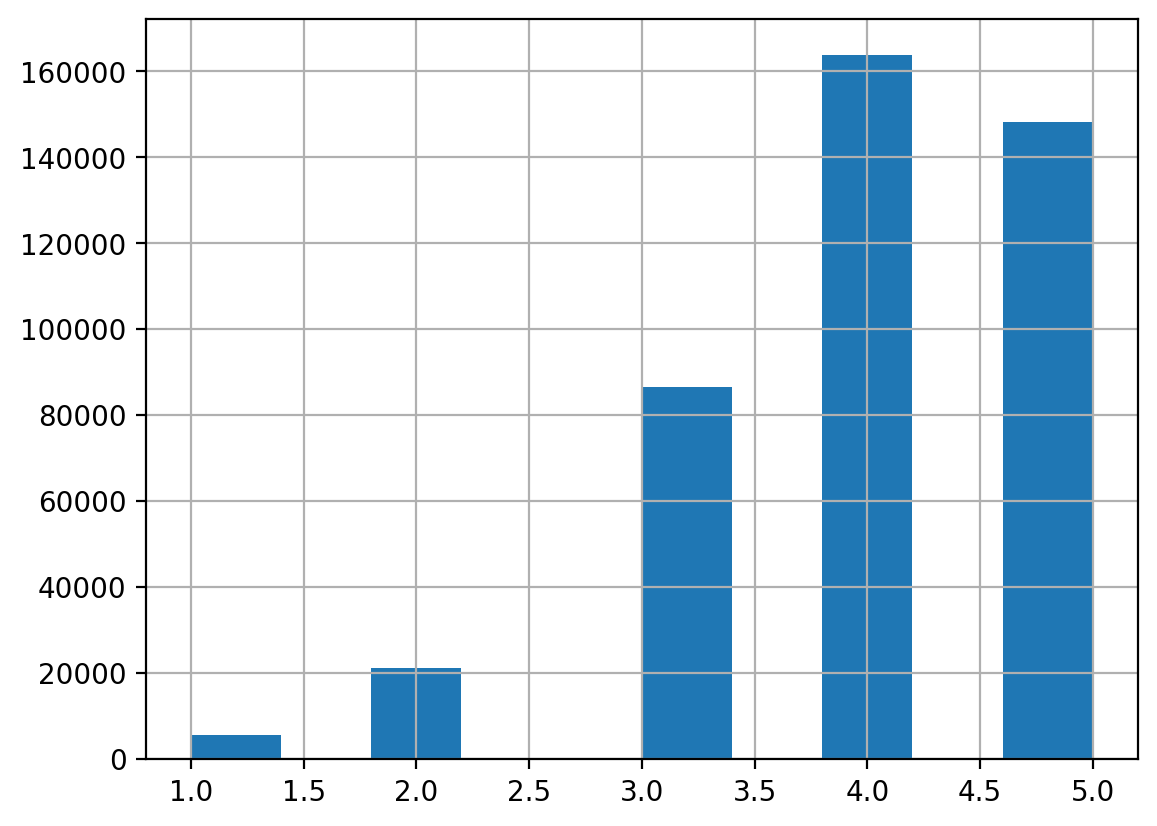

In [57]:
pd.Series([i.r_ui for i in random_predictions]).hist()

Рассчитайте значение MAE для random_predictions. Округлите его до сотых. 
На сколько процентов MAE для случайных рекомендаций от NormalPredictor выше значения MAE от SVD? Ответ округлите до десятых.

In [58]:
from surprise import accuracy

mae = accuracy.mae(random_predictions)

MAE:  1.0018


In [59]:
(1.014652928254169 - 0.647437483750257) / 0.647437483750257

0.567182861234463

In [60]:
mae

1.0017726877569562

# Факультативное задание

Удалите из events события для редких айтемов — таких, с которыми взаимодействовало менее N пользователей. Возьмите небольшое N, например 2–3 пользователя. Получите рекомендации, посчитайте метрики, оцените, как они изменились. Подумайте, с чем могут быть связаны такие изменения.

In [61]:
N = 3

In [62]:
small_items = list(
    events.groupby('item_id').agg({'user_id': 'count'}).query('user_id < @N').index
)

In [63]:
small_events_test = events_test.query('item_id in @small_items')
small_surprise_test_set = list(small_events_test[['user_id', 'item_id', 'rating']].itertuples(index=False))

# получаем рекомендации для тестовой выборки
small_svd_predictions = svd_model.test(small_surprise_test_set)

In [64]:
from surprise import accuracy

rmse = accuracy.rmse(small_svd_predictions)
mae = accuracy.mae(small_svd_predictions)
                     
print(rmse, mae)

RMSE: 0.9307
MAE:  0.7457
0.9307258087912385 0.7456741373891175


In [65]:
# Разница
0.9307258087912385 - 0.8288711689059135, 0.7456741373891175 - 0.647437483750257

(0.10185463988532495, 0.09823665363886047)

In [66]:
# Эксперимент с холодными пользователями
cold_users = set(events_test['user_id'].unique()) - set(events_train['user_id'].unique())
len(cold_users)

2365

In [67]:
cold_events_test = events_test.query('user_id in @cold_users')
cold_surprise_test_set = list(
    cold_events_test[['user_id', 'item_id', 'rating']].itertuples(index=False)
)

# получаем рекомендации для тестовой выборки
cold_svd_predictions = svd_model.test(cold_surprise_test_set)

In [68]:
from surprise import accuracy

rmse = accuracy.rmse(cold_svd_predictions)
mae = accuracy.mae(cold_svd_predictions)
                     
print(rmse, mae)

RMSE: 0.8941
MAE:  0.7178
0.8940976810617918 0.7178012838767979


In [69]:
# Разница
0.8940976810617918 - 0.8288711689059135, 0.7178012838767979 - 0.647437483750257

(0.06522651215587827, 0.07036380012654087)

# Получение рекомендаций

In [70]:
svd_model.predict(1296647, 18467802)

Prediction(uid=1296647, iid=18467802, r_ui=None, est=3.775084479578892, details={'was_impossible': False})

In [71]:
events_test

,user_id,item_id,started_at,read_at,is_read,rating,is_reviewed,started_at_month
84,1196635,18467802,2017-09-01,2017-09-22,True,1,False,2017-09-01
257,1188739,10799,2017-08-06,2017-10-14,True,3,False,2017-08-01
270,1001879,13206828,2017-09-24,2017-09-28,True,5,True,2017-09-01
271,1001879,13206900,2017-09-28,2017-10-07,True,4,True,2017-09-01
272,1001879,13206760,2017-09-21,2017-09-24,True,5,True,2017-09-01
...,...,...,...,...,...,...,...,...
12913921,1145655,25781157,2017-08-04,2017-08-14,True,3,False,2017-08-01
12914084,1166047,92057,2017-08-20,2017-09-17,True,5,False,2017-08-01
12914085,1166047,168668,2017-08-03,2017-08-19,True,2,False,2017-08-01
12914150,1155073,25300956,2017-08-12,2017-10-14,True,5,False,2017-08-01


Создайте функцию, которая позволит получить рекомендации для конкретного пользователя, используя описанный подход. Дополните прекод.

In [72]:
def get_recommendations_svd(user_id, all_items, events, model, include_seen=True, n=5):

    """ возвращает n рекомендаций для user_id """
    
    # получим список идентификаторов всех книг
    all_items = set(all_items['item_id'].unique())
        
    # учитываем флаг, стоит ли уже прочитанные книги включать в рекомендации
    if include_seen:
        items_to_predict = list(all_items)
    else:
        # получим список книг, которые пользователь уже прочитал ("видел")
        seen_items = set(events[events['user_id'] == user_id]['item_id'].unique())
        
        # книги, которые пользователь ещё не читал
        # только их и будем включать в рекомендации
        items_to_predict = list(all_items - seen_items)
    
    # получаем скоры для списка книг, т. е. рекомендации
    predictions = [model.predict(user_id, item_id) for item_id in items_to_predict]
    
    # сортируем рекомендации по убыванию скора и берём только n первых
    recommendations = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]
    
    return pd.DataFrame(
        [(pred.iid, pred.est) for pred in recommendations],
        columns=["item_id", "score"]
    )

In [73]:
get_recommendations_svd(1296647, items, events_train, svd_model, include_seen=False) 

,item_id,score
0,24812,5.000000
1,7864312,4.981188
2,25793186,4.912001
3,12174312,4.898052
4,13208,4.894869


# Дополнительная проверка качества рекомендаций

Некоторые проблемы рекомендаций отследить с помощью метрик сложно. Например, с помощью метрик сложно выявить рекомендации с низким разнообразием — когда пользователю, который прочитал книгу одного автора, рекомендуются книги преимущественно того же автора. Такие проблемы проще отследить «глазами». 
Для этого нужно вывести последние события для случайного пользователя и рекомендации для него. Это можно сделать с помощью функции get_recommendations_svd:

In [74]:
# выберем произвольного пользователя из тренировочной выборки ("прошлого")
user_id = events_train['user_id'].sample().iat[0]

print(f"user_id: {user_id}")

print("История (последние события, recent)")
user_history = (
    events_train
    .query("user_id == @user_id")
    .merge(items.set_index("item_id")[["author", "title", "genre_and_votes"]], on="item_id")
)
user_history_to_print = user_history[
    ["author", "title", "started_at", "read_at", "rating", "genre_and_votes"]
]#.sample(10)
display(user_history_to_print)

print("Рекомендации")
user_recommendations = get_recommendations_svd(user_id, items, events_train, svd_model)
user_recommendations = user_recommendations.merge(
    items[["item_id", "author", "title", "genre_and_votes"]],
    on="item_id"
)
display(user_recommendations)

user_id: 1169023
История (последние события, recent)


,author,title,started_at,read_at,rating,genre_and_votes
0,Naomi Alderman,The Power,2017-07-24,2017-08-01,5,"{'Fiction': 3007, 'Science Fiction': 1576, 'Fe..."
1,"George Orwell, Erich Fromm",1984,2017-02-17,2017-08-25,3,"{'Classics': 33441, 'Fiction': 21086, 'Science..."
2,Robert Dugoni,The Trapped Girl (Tracy Crosswhite #4),2017-01-30,2017-02-13,4,"{'Mystery': 222, 'Fiction': 104, 'Thriller': 7..."
3,Kerry Lonsdale,"Everything We Keep (Everything We Keep, #1)",2017-01-26,2017-01-30,3,"{'Fiction': 314, 'Mystery': 215, 'Romance': 18..."
4,Brian Freeman,"The Night Bird (Frost Easton, #1)",2017-01-10,2017-01-16,2,"{'Mystery': 254, 'Thriller': 156, 'Fiction': 1..."
...,...,...,...,...,...,...
73,Gillian Flynn,Dark Places,2014-05-17,2014-05-22,4,"{'Mystery': 4534, 'Fiction': 4055, 'Thriller':..."
74,Audrey Niffenegger,Her Fearful Symmetry,2014-05-05,2014-05-08,2,"{'Fiction': 1984, 'Fantasy': 674, 'Fantasy-Par..."
75,Kathy Reichs,"Déjà Dead (Temperance Brennan, #1)",2014-05-13,2014-05-17,4,"{'Mystery': 2141, 'Fiction': 904, 'Mystery-Cri..."
76,Carolyn Parkhurst,The Dogs of Babel,2014-05-09,2014-05-10,5,"{'Fiction': 522, 'Mystery': 102, 'Animals': 77..."


Рекомендации


,item_id,score,author,title,genre_and_votes
0,2199,5,Doris Kearns Goodwin,Team of Rivals: The Political Genius of Abraha...,"{'History': 4174, 'Nonfiction': 2127, 'Biograp..."
1,16255632,5,"David Gaider, Ben Gelinas, Mike Laidlaw, Dave ...",Dragon Age: The World of Thedas Volume 1,"{'Fantasy': 134, 'Games-Video Games': 28, 'Art..."
2,2363958,5,João Guimarães Rosa,Grande Sertão: Veredas,"{'Fiction': 85, 'Classics': 69, 'Cultural-Braz..."
3,22552026,5,Jason Reynolds,Long Way Down,"{'Young Adult': 1871, 'Poetry': 1737, 'Contemp..."
4,29237211,5,"Brian K. Vaughan, Fiona Staples","Saga, Vol. 7 (Saga, #7)","{'Sequential Art-Graphic Novels': 2539, 'Seque..."


# Факультативное задание

Добавьте в events события для нового пользователя, как если бы он прочитал те книги, которые нравятся вам. Получите рекомендации для этого пользователя. Оцените, насколько они релевантны вашим интересам.

In [75]:
events.user_id.max()

1430584

In [76]:
events

,user_id,item_id,started_at,read_at,is_read,rating,is_reviewed,started_at_month
0,1229132,22034,2015-07-12,2015-07-17,True,5,False,2015-07-01
1,1229132,22318578,2015-06-07,2015-08-09,True,5,True,2015-06-01
2,1229132,22551730,2015-06-24,2015-07-11,True,4,True,2015-06-01
3,1229132,22816087,2015-09-27,2015-11-04,True,5,True,2015-09-01
5,1229132,17910054,2015-03-04,2015-07-28,True,3,False,2015-03-01
...,...,...,...,...,...,...,...,...
12914452,1364473,5297,2017-02-07,2017-02-26,True,5,False,2017-02-01
12914453,1364473,4900,2016-12-22,2016-12-29,True,2,False,2016-12-01
12914454,1364473,14836,2016-11-29,2017-01-15,True,3,False,2016-11-01
12914456,1297020,10210,2012-06-05,2013-01-17,True,5,False,2012-06-01


In [77]:
events_test.groupby('user_id').agg({'item_id': 'count'}).sort_values('item_id')

,item_id
user_id,
1218605,1
1218467,1
1218471,1
1218488,1
1218499,1
...,...
1390859,90
1068880,92
1169483,116


In [78]:
new_events = events_test.query("user_id == 1038215")
new_events.shape

(141, 8)

In [79]:
# выберем произвольного пользователя из тренировочной выборки ("прошлого")
user_id = 1038215

print(f"user_id: {user_id}")

print("История (последние события, recent)")
user_history = (
    pd.concat([events_train, new_events])
    .query("user_id == @user_id")
    .merge(
        items.set_index("item_id")[["author", "title", "genre_and_votes"]],
        on="item_id"
    )
)
user_history_to_print = user_history[
    ["author", "title", "started_at", "read_at", "rating", "genre_and_votes"]
]#.sample(10)
display(user_history_to_print)

print("Рекомендации")
user_recommendations = get_recommendations_svd(user_id, items, pd.concat([events_train, new_events]), svd_model)
user_recommendations = user_recommendations.merge(
    items[["item_id", "author", "title", "genre_and_votes"]],
    on="item_id"
)
display(user_recommendations)

user_id: 1038215
История (последние события, recent)


,author,title,started_at,read_at,rating,genre_and_votes
0,Lisa Jackson,Cold Blooded (New Orleans #2),2017-07-31,2017-08-04,4,"{'Mystery': 90, 'Romance-Romantic Suspense': 6..."
1,Alanea Alder,"My Commander (Bewitched and Bewildered, #1)",2017-07-31,2017-09-20,4,"{'Romance-Paranormal Romance': 167, 'Paranorma..."
2,Edith Wharton,Ethan Frome,2017-07-18,2017-09-07,3,"{'Classics': 3825, 'Fiction': 1909, 'Literatur..."
3,Karina Halle,"Dead Sky Morning (Experiment in Terror, #3)",2017-07-13,2017-07-18,4,"{'Fantasy-Paranormal': 278, 'Horror': 226, 'Pa..."
4,Sarah Brianne,"Nero (Made Men, #1)",2017-07-15,2017-08-29,4,"{'Romance': 311, 'New Adult': 291, 'Sociology-..."
...,...,...,...,...,...,...
3135,Trevor Shane,"Children of Paranoia (Children of Paranoia, #1)",2017-10-02,2017-10-07,3,"{'Thriller': 27, 'Fiction': 23, 'Science Ficti..."
3136,Sherwood Smith,"Crown Duel (Crown & Court, #1)",2017-10-17,2017-10-19,3,"{'Fantasy': 706, 'Young Adult': 275, 'Romance'..."
3137,Denise Hunter,"Surrender Bay (Nantucket, #1)",2017-08-11,2017-08-13,3,"{'Christian Fiction': 77, 'Romance': 71, 'Chri..."
3138,Candice Millard,"Destiny of the Republic: A Tale of Madness, Me...",2017-09-06,2017-09-07,3,"{'History': 2171, 'Nonfiction': 1374, 'Biograp..."


Рекомендации


,item_id,score,author,title,genre_and_votes
0,24812,4.696844,Bill Watterson,The Complete Calvin and Hobbes,"{'Sequential Art-Comics': 867, 'Humor': 378, '..."
1,33353628,4.650112,Pénélope Bagieu,"Culottées #2 (Culottées, #2)","{'Sequential Art-Bande DessinÃ©e': 108, 'Femin..."
2,11221285,4.622302,Brandon Sanderson,"The Way of Kings, Part 2 (The Stormlight Archi...","{'Fantasy': 641, 'Fiction': 46, 'Fantasy-Epic ..."
3,22037424,4.608802,"J.K. Rowling, Jonny Duddle, Tomislav Tomić",Harry Potter and the Prisoner of Azkaban (Harr...,"{'Fantasy': 49994, 'Young Adult': 15433, 'Fict..."
4,77730,4.606669,Bill Watterson,Weirdos from Another Planet!: A Calvin and Hob...,"{'Sequential Art-Comics': 656, 'Humor': 300, '..."


# Коллаборативная фильтрация: ALS

Ниже приведён код для перекодировки идентификаторов. Дополните его для перекодировки идентификаторов объектов, а затем выполните.

In [80]:
import scipy
import sklearn.preprocessing

# перекодируем идентификаторы пользователей: 
# из имеющихся в последовательность 0, 1, 2, ...
user_encoder = sklearn.preprocessing.LabelEncoder()
user_encoder.fit(events["user_id"])
events_train["user_id_enc"] = user_encoder.transform(events_train["user_id"])
events_test["user_id_enc"] =  user_encoder.transform(events_test["user_id"])

# перекодируем идентификаторы объектов: 
# из имеющихся в последовательность 0, 1, 2, ...
item_encoder = sklearn.preprocessing.LabelEncoder()
item_encoder.fit(items["item_id"])
items["item_id_enc"] =        item_encoder.transform(items["item_id"])
events_train["item_id_enc"] = item_encoder.transform(events_train["item_id"]) # ваш код здесь #
events_test["item_id_enc"] =  item_encoder.transform(events_test["item_id"]) # ваш код здесь #

/tmp/ipykernel_1494/2133160758.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_train["user_id_enc"] = user_encoder.transform(events_train["user_id"])
/tmp/ipykernel_1494/2133160758.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_test["user_id_enc"] =  user_encoder.transform(events_test["user_id"])
/tmp/ipykernel_1494/2133160758.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [81]:
events_train['item_id_enc'].max()

43304

Вычислите размер матрицы user_item_matrix_train, как если бы она хранила все свои элементы, включая пропуски, и для каждого элемента использовался бы один байт. Ответ приведите в виде целого числа гигабайтов, отбросив дробную часть.

In [82]:
round(
    (events_train.user_id.nunique() * events_train.item_id.nunique()) /
    (1024 ** 3)
)

17

Матрица взаимодействий — сильно разреженная, и можно хранить её эффективнее. Рассматриваемая реализация ALS работает с numpy-матрицами, поэтому её можно создать с помощью методов numpy. Мы создадим sparse-матрицу в формате CSR. Такая матрица хранит только имеющиеся значения и не резервирует память под пропуски. Это помогает значительно сэкономить оперативную память при работе с разреженными матрицами.

Выполните код ниже.

In [83]:
# создаём sparse-матрицу формата CSR 
user_item_matrix_train = scipy.sparse.csr_matrix((
    events_train["rating"],
    (events_train['user_id_enc'], events_train['item_id_enc'])),
    dtype=np.int8)

In [84]:
user_item_matrix_train

<430585x43305 sparse matrix of type '<class 'numpy.int8'>'
	with 11326124 stored elements in Compressed Sparse Row format>

sparse-формат numpy-матриц позволяет сильно уменьшить требование к размеру памяти. Можно самостоятельно посчитать и сравнить, используя код ниже:

In [85]:
import sys

sum([sys.getsizeof(i) for i in user_item_matrix_train.data]) / 1024**3 

0.26370687410235405

Имея подготовленную матрицу взаимодействий, перейдём к третьему шагу — создадим ALS-модель. Для примера возьмём количество латентных факторов для матриц $P, Q$, равным 50. 

Выполните код для создания и тренировки модели.

In [86]:
from implicit.als import AlternatingLeastSquares

als_model = AlternatingLeastSquares(
    factors=50, iterations=50,
    regularization=0.05, random_state=0
)
als_model.fit(user_item_matrix_train)

/home/mle-user/mle_projects/mle-recsys-start/venv/lib/python3.10/site-packages/implicit/cpu/als.py:95: RuntimeWarning: OpenBLAS is configured to use 4 threads. It is highly recommended to disable its internal threadpool by setting the environment variable 'OPENBLAS_NUM_THREADS=1' or by calling 'threadpoolctl.threadpool_limits(1, "blas")'. Having OpenBLAS use a threadpool can lead to severe performance issues here.
  check_blas_config()


  0%|          | 0/50 [00:00<?, ?it/s]

Чтобы получить рекомендации для пользователя с помощью модели ALS, используем такую функцию:

In [87]:
def get_recommendations_als(
    user_item_matrix,
    model,
    user_id,
    user_encoder,
    item_encoder,
    include_seen=True,
    n=5
):
    """
    Возвращает отранжированные рекомендации для заданного пользователя
    """
    user_id_enc = user_encoder.transform([user_id])[0]
    recommendations = model.recommend(
         user_id_enc, 
         user_item_matrix[user_id_enc], 
         filter_already_liked_items=not include_seen,
         N=n)
    recommendations = pd.DataFrame(
        {"item_id_enc": recommendations[0], "score": recommendations[1]}
    )
    recommendations["item_id"] = item_encoder.inverse_transform(
        recommendations["item_id_enc"])
    
    return recommendations

In [88]:
user_id = 1038215
res = get_recommendations_als(
    user_item_matrix_train,
    als_model,
    user_id,
    user_encoder,
    item_encoder,
    include_seen=False,
    n=10000000
)

In [89]:
events_train.query('user_id == 1038215')

,user_id,item_id,started_at,read_at,is_read,rating,is_reviewed,started_at_month,user_id_enc,item_id_enc
9912475,1038215,228117,2017-07-31,2017-08-04,True,4,False,2017-07-01,38215,10318
9912476,1038215,22873996,2017-07-31,2017-09-20,True,4,False,2017-07-01,38215,39182
9912477,1038215,5246,2017-07-18,2017-09-07,True,3,False,2017-07-01,38215,593
9912478,1038215,12322385,2017-07-13,2017-07-18,True,4,False,2017-07-01,38215,30278
9912479,1038215,22494969,2017-07-15,2017-08-29,True,4,False,2017-07-01,38215,38812
...,...,...,...,...,...,...,...,...,...,...
9915636,1038215,9361589,2014-01-02,2014-01-30,True,4,False,2014-01-01,38215,27575
9915637,1038215,487445,2016-05-13,2016-05-23,True,4,False,2016-05-01,38215,13852
9915638,1038215,6718608,2016-07-14,2016-07-23,True,3,False,2016-07-01,38215,24671
9915641,1038215,550821,2016-01-21,2016-02-17,True,3,False,2016-01-01,38215,14394


In [90]:
res.query('item_id == 228117')

,item_id_enc,score,item_id
42392,10318,-3.402823e+38,228117


# Факультативное задание

Используя get_recommendations_als, напишите код, который позволит для случайного пользователя просмотреть рекомендации в удобном формате: 
- история с именами авторов и названием книг,
- рекомендации с именами авторов и названием книг, seen-признаком (взаимодействовал ли уже пользователь с рекомендованной книгой).

Проанализируйте, релевантны ли рекомендации имеющейся истории.

In [91]:
def get_recommendations_als(
    user_item_matrix,
    model,
    user_id,
    user_encoder,
    item_encoder,
    include_seen=True,
    n=5
):
    """
    Возвращает отранжированные рекомендации для заданного пользователя
    """
    user_id_enc = user_encoder.transform([user_id])[0]
    recommendations = model.recommend(
         user_id_enc, 
         user_item_matrix[user_id_enc], 
         filter_already_liked_items=not include_seen,
         N=n)
    recommendations = pd.DataFrame(
        {"item_id_enc": recommendations[0], "score": recommendations[1]}
    )
    recommendations["item_id"] = item_encoder.inverse_transform(
        recommendations["item_id_enc"])
    
    return recommendations

In [92]:
def show_info(
    user_item_matrix,
    model,
    user_id,
    user_encoder,
    item_encoder,
    items,
    include_seen=True,
    n=5
):
    info = get_recommendations_als(
        user_item_matrix, model, user_id, user_encoder, item_encoder, include_seen=True, n=5
    )
    return info.merge(
        items.set_index("item_id")[["author", "title", "genre_and_votes"]],
        on="item_id"
    )

show_info(
    user_item_matrix_train,
    als_model,
    user_id,
    user_encoder,
    item_encoder,
    items
)

,item_id_enc,score,item_id,author,title,genre_and_votes
0,26926,1.852487,8492825,Gayle Forman,"Where She Went (If I Stay, #2)","{'Young Adult': 4079, 'Romance': 2331, 'Contem..."
1,32544,1.826056,14740588,Janet Evanovich,"Notorious Nineteen (Stephanie Plum, #19)","{'Mystery': 1162, 'Fiction': 427, 'Humor': 367..."
2,5969,1.822443,78129,Lee Child,"Killing Floor (Jack Reacher, #1)","{'Thriller': 2060, 'Fiction': 1873, 'Mystery':..."
3,22228,1.788192,4374400,Gayle Forman,"If I Stay (If I Stay, #1)",{'Young Adult': 7947}
4,40765,1.760902,25644601,E.L. James,"Grey (Fifty Shades, #4)","{'Romance': 1289, 'Adult Fiction-Erotica': 541..."


In [93]:
def show_info(
    user_item_matrix,
    model,
    user_id,
    user_encoder,
    item_encoder,
    items,
    events_train,
    include_seen=True,
    n=5
):
    info = get_recommendations_als(
        user_item_matrix, model, user_id, user_encoder, item_encoder, include_seen, n
    )
    seen = set(events_train.query('user_id == @user_id').item_id.unique())
    info = info.merge(items.set_index('item_id')[["author", "title", "genre_and_votes"]], on="item_id")
    info['seen'] = info.item_id.apply(lambda x: x in seen)
    return info

res = show_info(
    user_item_matrix_train,
    als_model,
    user_id,
    user_encoder,
    item_encoder,
    items,
    events_train,
    n = 5,
    include_seen=True
); res

,item_id_enc,score,item_id,author,title,genre_and_votes,seen
0,26926,1.852487,8492825,Gayle Forman,"Where She Went (If I Stay, #2)","{'Young Adult': 4079, 'Romance': 2331, 'Contem...",False
1,32544,1.826056,14740588,Janet Evanovich,"Notorious Nineteen (Stephanie Plum, #19)","{'Mystery': 1162, 'Fiction': 427, 'Humor': 367...",True
2,5969,1.822443,78129,Lee Child,"Killing Floor (Jack Reacher, #1)","{'Thriller': 2060, 'Fiction': 1873, 'Mystery':...",True
3,22228,1.788192,4374400,Gayle Forman,"If I Stay (If I Stay, #1)",{'Young Adult': 7947},False
4,40765,1.760902,25644601,E.L. James,"Grey (Fifty Shades, #4)","{'Romance': 1289, 'Adult Fiction-Erotica': 541...",False


In [94]:
res.seen.sum()

2

Получим рекомендации для всех имеющихся пользователей. Выполните код ниже.

In [95]:
# получаем список всех возможных user_id (перекодированных)
user_ids_encoded = range(len(user_encoder.classes_))

# получаем рекомендации для всех пользователей
als_recommendations = als_model.recommend(
    user_ids_encoded, 
    user_item_matrix_train[user_ids_encoded], 
    filter_already_liked_items=False,
    N=100
)

Код возвращает рекомендации как список списков, это не очень удобно. Преобразуем его в более удобный формат — табличный.


In [96]:
# преобразуем полученные рекомендации в табличный формат
item_ids_enc = als_recommendations[0]
als_scores = als_recommendations[1]

als_recommendations = pd.DataFrame({
    "user_id_enc": user_ids_encoded,      # range(0, 430585)
    "item_id_enc": item_ids_enc.tolist(), # als_recommendations[0] -> array([[    2,  1942,     3, ..., 28836, 30688, 10393],
    "score": als_scores.tolist()})        # als_recommendations[1] > array([[0.99094146, 0.89661723, 0.8644041 , ..., 0.2261226 , 0.22548363,
als_recommendations = als_recommendations.explode(["item_id_enc", "score"], ignore_index=True)
als_recommendations

,user_id_enc,item_id_enc,score
0,0,2,0.990941
1,0,1942,0.896617
2,0,3,0.864404
3,0,4,0.822254
4,0,1,0.774095
...,...,...,...
43058495,430584,31275,0.096082
43058496,430584,22529,0.096065
43058497,430584,33675,0.094949
43058498,430584,28263,0.094927


In [97]:
als_recommendations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43058500 entries, 0 to 43058499
Data columns (total 3 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id_enc  int64 
 1   item_id_enc  object
 2   score        object
dtypes: int64(1), object(2)
memory usage: 985.5+ MB


In [98]:
# приводим типы данных
als_recommendations["item_id_enc"] = als_recommendations["item_id_enc"].astype("int")
als_recommendations["score"] = als_recommendations["score"].astype("float")

In [99]:
als_recommendations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43058500 entries, 0 to 43058499
Data columns (total 3 columns):
 #   Column       Dtype  
---  ------       -----  
 0   user_id_enc  int64  
 1   item_id_enc  int64  
 2   score        float64
dtypes: float64(1), int64(2)
memory usage: 985.5 MB


In [100]:
# получаем изначальные идентификаторы
als_recommendations["user_id"] = user_encoder.inverse_transform(als_recommendations["user_id_enc"])
als_recommendations["item_id"] = item_encoder.inverse_transform(als_recommendations["item_id_enc"])
als_recommendations = als_recommendations.drop(columns=["user_id_enc", "item_id_enc"])

In [101]:
als_recommendations

,score,user_id,item_id
0,0.990941,1000000,3
1,0.896617,1000000,15881
2,0.864404,1000000,5
3,0.822254,1000000,6
4,0.774095,1000000,2
...,...,...,...
43058495,0.096082,1430584,13206900
43058496,0.096065,1430584,5060378
43058497,0.094949,1430584,16071764
43058498,0.094927,1430584,9969571


Сохраним полученные рекомендации в файл, они ещё нам пригодятся.

In [102]:
als_recommendations = als_recommendations[["user_id", "item_id", "score"]]
als_recommendations.to_parquet("als_recommendations.parquet")

# Метрики

In [103]:
events_test

,user_id,item_id,started_at,read_at,is_read,rating,is_reviewed,started_at_month,user_id_enc,item_id_enc
84,1196635,18467802,2017-09-01,2017-09-22,True,1,False,2017-09-01,196635,36588
257,1188739,10799,2017-08-06,2017-10-14,True,3,False,2017-08-01,188739,1262
270,1001879,13206828,2017-09-24,2017-09-28,True,5,True,2017-09-01,1879,31274
271,1001879,13206900,2017-09-28,2017-10-07,True,4,True,2017-09-01,1879,31275
272,1001879,13206760,2017-09-21,2017-09-24,True,5,True,2017-09-01,1879,31273
...,...,...,...,...,...,...,...,...,...,...
12913921,1145655,25781157,2017-08-04,2017-08-14,True,3,False,2017-08-01,145655,40870
12914084,1166047,92057,2017-08-20,2017-09-17,True,5,False,2017-08-01,166047,6577
12914085,1166047,168668,2017-08-03,2017-08-19,True,2,False,2017-08-01,166047,9075
12914150,1155073,25300956,2017-08-12,2017-10-14,True,5,False,2017-08-01,155073,40537


In [104]:
als_recommendations = (
    als_recommendations
    .merge(events_test[["user_id", "item_id", "rating"]]
               .rename(columns={"rating": "rating_test"}), 
           on=["user_id", "item_id"], how="left")
) 

In [105]:
als_recommendations.isna().sum().sum() / als_recommendations.shape[0]

0.9981305897790216

Подсчитать метрику NDCG для одного пользователя поможет готовая реализация из scikit-learn:

In [106]:
import sklearn.metrics

def compute_ndcg(rating: pd.Series, score: pd.Series, k: int=None):

    """ подсчёт ndcg
    rating: истинные оценки
    score: оценки модели
    k: количество айтемов (по убыванию score) для оценки, остальные - отбрасываются
    """
    
    # если кол-во объектов меньше 2, то NDCG - не определена
    if len(rating) < 2:
        return np.nan

    ndcg = sklearn.metrics.ndcg_score(
        np.asarray([rating.to_numpy()]),
        np.asarray([score.to_numpy()]),
        k=k
    )

    return ndcg

In [107]:
rating = (
    als_recommendations[~als_recommendations['rating_test'].isna()]
    .rating_test
)
score = (
    als_recommendations[~als_recommendations['rating_test'].isna()]
    .score
)

In [108]:
compute_ndcg(rating, score)

0.9878692868652608

In [109]:
rating_test_idx = ~als_recommendations["rating_test"].isna()

In [110]:
ndcg_at_5_scores = (
    als_recommendations[rating_test_idx]
    .groupby("user_id")
    .apply(
        lambda x: compute_ndcg(x["rating_test"], x["score"], k=5)
    )
)

In [111]:
round(ndcg_at_5_scores.mean(), 4)

0.9759

# Факультативное задание

Оцените, для какой доли пользователей удалось посчитать метрику NDCG.

In [112]:
rating_test_idx.sum() / rating_test_idx.shape[0]

0.0018694102209784362

Используя метод  `similar_items`, получите и оцените рекомендации для нескольких айтемов. Проанализируйте адекватность результатов.

In [113]:
# ? Задан вопрос авторам

# Контентные рекомендации

Составим список всех жанров
Составим список всех возможных жанров по всем айтемам. Потом по нему будем составлять вектор с весами по жанрам для каждой книги. Из любопытства составим список жанров с подсчётом количества голосов по каждому из них.
Сначала преобразуем значения в genre_and_votes из текстового представления в тип в Python:

In [114]:
items["genre_and_votes"] = items["genre_and_votes"].apply(eval)

Задание 1 из 4

Теперь составьте список жанров с долями голосов по ним в genres.  Дополните и выполните следующий код:

In [115]:
def get_genres(items):

    """ 
    извлекает список жанров по всем книгам, 
    подсчитывает долю голосов по каждому их них
    """
    
    genres_counter = {}
    
    for k, v, in items.iterrows():
        genre_and_votes = v['genre_and_votes_dict'] # ваш код здесь #
        if genre_and_votes is None or not isinstance(genre_and_votes, dict):
            continue
        for genre, votes in genre_and_votes.items():
            # увеличиваем счётчик жанров
            try:
                genres_counter[genre] += votes if votes else 0 # ваш код здесь #
            except KeyError:
                genres_counter[genre] = 0

    genres = pd.Series(genres_counter, name="votes")
    genres = genres.to_frame()
    genres = genres.reset_index().rename(columns={"index": "name"})
    genres.index.name = "genre_id"
    
    return genres
   
genres = get_genres(items)

Результат выполнения кода — список жанров с долями голосов по ним в genres. Посмотрим на самые популярные жанры:

In [116]:
genres["score"] = genres["votes"] / genres["votes"].sum()
genres.sort_values(by="score", ascending=False).head(10)

,name,votes,score
genre_id,,,
285,Fantasy,6850115.0,0.149502
308,Fiction,6406256.0,0.139815
132,Classics,3415071.0,0.074533
800,Young Adult,3297027.0,0.071957
640,Romance,2422690.0,0.052874
535,Nonfiction,1737798.0,0.037927
378,Historical-Historical Fiction,1531489.0,0.033424
512,Mystery,1371370.0,0.029930
665,Science Fiction,1218997.0,0.026604


In [117]:
genres.shape

(815, 3)

Задание 2 из 4

Функция в коде ниже строит матрицу вида «книга-жанр». Изучите её. Подумайте, что будет соответствовать столбцам матрицы. 

In [118]:
def get_item2genre_matrix(genres, items):

    genre_names_to_id = genres.reset_index().set_index("name")["genre_id"].to_dict()
    
    # list to build CSR matrix
    genres_csr_data = []
    genres_csr_row_idx = []
    genres_csr_col_idx = []
    
    for item_idx, (k, v) in enumerate(items.iterrows()):
        if v["genre_and_votes"] is None:
            continue
        for genre_name, votes in v["genre_and_votes"].items():
            genre_idx = genre_names_to_id[genre_name]
            genres_csr_data.append(int(votes))
            genres_csr_row_idx.append(item_idx)
            genres_csr_col_idx.append(genre_idx)

    genres_csr = scipy.sparse.csr_matrix(
        (genres_csr_data, (genres_csr_row_idx, genres_csr_col_idx)),
        shape=(len(items), len(genres))
    )
    # нормализуем, чтобы сумма оценок принадлежности к жанру была равна 1
    genres_csr = sklearn.preprocessing.normalize(genres_csr, norm='l1', axis=1)
    
    return genres_csr

В genres_csr_col_idx добавляются индексы, соответствующие жанрам.

Получим матрицу с весами по жанрам для каждой книги:

In [119]:
items = items.sort_values(by="item_id_enc")
all_items_genres_csr = get_item2genre_matrix(genres, items)

In [120]:
all_items_genres_csr

<43312x815 sparse matrix of type '<class 'numpy.float64'>'
	with 210895 stored elements in Compressed Sparse Row format>

Аналогичным образом получим матрицу с весами по жанрам для какого-нибудь пользователя, например, для пользователя с идентификатором 1000010. 

Задание 3 из 4

Дополните и выполните код ниже, чтобы получить описанную матрицу. 

In [121]:
user_id = 1000010
user_events = events_train.query("user_id == @user_id")[["item_id", "rating"]]
user_items = items[items["item_id"].isin(user_events["item_id"])]

user_items_genres_csr = get_item2genre_matrix(genres, user_items)
user_items_genres_csr

<22x815 sparse matrix of type '<class 'numpy.float64'>'
	with 149 stored elements in Compressed Sparse Row format>

Если посчитать средние, то фактически получим предпочтения пользователя по жанрам.

In [122]:
# вычислим склонность пользователя к жанрам как среднее взвешенное значение популяции на его оценки книг.

# преобразуем пользовательские оценки из списка в вектор-столбец
user_ratings = user_events["rating"].to_numpy() / 5
user_ratings = np.expand_dims(user_ratings, axis=1)
user_ratings

array([[1. ],
       [1. ],
       [0.8],
       [0.4],
       [0.6],
       [1. ],
       [0.8],
       [0.8],
       [0.8],
       [1. ],
       [0.4],
       [0.2],
       [0.8],
       [1. ],
       [0.6],
       [0.8],
       [0.8],
       [0.6],
       [0.8],
       [0.8],
       [0.8],
       [0.2]])

In [123]:
user_items_genres_weighted = user_items_genres_csr.multiply(user_ratings)
user_items_genres_weighted

<22x815 sparse matrix of type '<class 'numpy.float64'>'
	with 149 stored elements in COOrdinate format>

In [124]:
user_genres_scores = np.asarray(user_items_genres_weighted.mean(axis=0))
user_genres_scores

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.0003783 , 0.        , 0.        , 0.        , 0.        ,
        0.00628736, 0.00241027, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00058944, 0.        ,
        0.00154396, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00454038, 0.01312976,
        0.        , 0.        , 0.        , 0.  

Можно посмотреть, какие жанры больше всего нравятся пользователю:

In [125]:
# выведем список жанров, которые предпочитает пользователь

user_genres = genres.copy()
user_genres["score"] = np.ravel(user_genres_scores)
user_genres = user_genres[user_genres["score"] > 0].sort_values(by=["score"], ascending=False)

print(user_genres.shape)
user_genres.head(5)

(56, 3)


,name,votes,score
genre_id,,,
308,Fiction,6406256.0,0.185241
132,Classics,3415071.0,0.103879
285,Fantasy,6850115.0,0.072447
535,Nonfiction,1737798.0,0.050865
665,Science Fiction,1218997.0,0.040920


Задание 4 из 4

Получите наиболее релевантные рекомендации для пользователя.
Дополните код так, чтобы переменная `top_k_indices` заполнялась индексами соответствующих книг. Для этого удобно использовать `np.argsort` от `similarity_scores`, подсчитанной для всех книг.


In [126]:
from sklearn.metrics.pairwise import cosine_similarity

# вычисляем сходство между вектором пользователя и векторами по книгам
similarity_scores = cosine_similarity(all_items_genres_csr, user_genres_scores)

# преобразуем в одномерный массив
similarity_scores = similarity_scores.flatten()

# получаем индексы top-k (по убыванию значений), по сути, индексы книг (encoded)
k = 5
top_k_indices = np.argsort(similarity_scores, )[-k:] # ваш код здесь #
top_k_indices

array([ 4460,  9476, 14087, 36093,  4471])

In [127]:
np.sort(similarity_scores)[-k:]

array([0.91252841, 0.91514839, 0.9184179 , 0.92242087, 0.93533943])

После вычисления `top_k_indices` по полученным индексам извлеките список объектов, которые могут быть интересны пользователю, при помощи кода:

In [128]:
selected_items = items[items["item_id_enc"].isin(top_k_indices)]

with pd.option_context("max_colwidth", 100):
   display(selected_items[["author", "title", "genre_and_votes"]])

,author,title,genre_and_votes
80465,G.K. Chesterton,The Napoleon of Notting Hill,"{'Fiction': 166, 'Classics': 88, 'Fantasy': 44..."
1168335,Ray Bradbury,"Dandelion Wine (Green Town, #1)","{'Fiction': 1438, 'Classics': 914, 'Science Fi..."
393210,"G.K. Chesterton, Jonathan Lethem",The Man Who Was Thursday: A Nightmare,"{'Fiction': 1257, 'Classics': 929, 'Mystery': ..."
2244467,Samuel Butler,"Erewhon (Erewhon , #1)","{'Fiction': 162, 'Classics': 139, 'Science Fic..."
39408,"Paulo Coelho, Alan R. Clarke, James Noel Smith",The Alchemist,"{'Fiction': 14023, 'Classics': 5787, 'Fantasy'..."


# Факультативное задание

1. Получите по алгоритму выше рекомендации для нескольких пользователей, просмотрите их на экране. Подумайте, насколько релевантны и интересны полученные рекомендации пользователям.
1. Попробуйте использовать другую меру сходства для получения рекомендаций, например, евклидово расстояние. Проанализируйте, отличаются ли рекомендации от предыдущих. Подумайте почему.
1. Задайте собственные предпочтения для наиболее популярных жанров. Посмотрите рекомендации для себя. Прочитали ли бы вы рекомендованные книги?

In [129]:
###

Вы научились строить персонализированные рекомендации, не прибегая к данным об истории поведения пользователя, а используя свойства самих айтемов и сведения о предпочтениях пользователей из профиля. Такие рекомендации базируются на свойствах контента и служат хорошей альтернативой коллаборативным рекомендациям, когда нет информации по взаимодействию пользователей с айтемами.

# Валидация

Ниже приведён код для такой разметки:
- `gt` (ground truth): объект есть в тестовой выборке;
- `pr` (predicted): объект есть в рекомендациях.

Теперь разметим признаки бинарной классификации:
- `TP`: объект есть и в тестовой выборке, и в рекомендациях (истинная рекомендация),
- `FP`: объекта нет в тестовой выборке, но он есть в рекомендациях (ложноположительная рекомендация),
- `FN`: объект есть в тестовой выборке, но его нет в рекомендациях (ложноотрицательная рекомендация)

In [130]:
def process_events_recs_for_binary_metrics(events_train, events_test, recs, top_k=None):

    """
    размечает пары <user_id, item_id> для общего множества пользователей признаками
    - gt (ground truth)
    - pr (prediction)
    top_k: расчёт ведётся только для top k-рекомендаций
    """

    events_test["gt"] = True
    common_users = set(events_test["user_id"]) & set(recs["user_id"])

    print(f"Common users: {len(common_users)}")
    
    events_for_common_users = events_test[events_test["user_id"].isin(common_users)].copy()
    recs_for_common_users = recs[recs["user_id"].isin(common_users)].copy()

    recs_for_common_users = recs_for_common_users.sort_values(["user_id", "score"], ascending=[True, False])

    # оставляет только те item_id, которые были в events_train, 
    # т. к. модель не имела никакой возможности давать рекомендации для новых айтемов
    events_for_common_users = events_for_common_users[events_for_common_users["item_id"].isin(events_train["item_id"].unique())]

    if top_k is not None:
        recs_for_common_users = recs_for_common_users.groupby("user_id").head(top_k)
    
    events_recs_common = events_for_common_users[["user_id", "item_id", "gt"]].merge(
        recs_for_common_users[["user_id", "item_id", "score"]], 
        on=["user_id", "item_id"], how="outer")    

    events_recs_common["gt"] = events_recs_common["gt"].fillna(False)
    events_recs_common["pr"] = ~events_recs_common["score"].isnull()
    
    events_recs_common["tp"] = events_recs_common["gt"] & events_recs_common["pr"]
    events_recs_common["fp"] = ~events_recs_common["gt"] & events_recs_common["pr"]
    events_recs_common["fn"] = events_recs_common["gt"] & ~events_recs_common["pr"]

    return events_recs_common

Обработаем ALS-рекомендации для подсчёта метрик для 5 лучших рекомендаций:

In [131]:
events_recs_for_binary_metrics = process_events_recs_for_binary_metrics(
    events_train,
    events_test, 
    als_recommendations, 
    top_k=5
)

/tmp/ipykernel_1494/3166051426.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_test["gt"] = True


Common users: 123223


In [132]:
events_recs_for_binary_metrics.sample(5)

,user_id,item_id,gt,score,pr,tp,fp,fn
638506,1154668,7864437,False,1.236950,True,False,True,False
767675,1246412,5107,False,0.536877,True,False,True,False
685632,1188280,11505797,False,1.341463,True,False,True,False
753788,1236576,17675462,False,0.578484,True,False,True,False
176309,1149227,8600,True,NaN,False,False,False,True


Мы получили разметку случившихся в будущем событий (`events_test`) и рекомендаций (`als_recommendations`: то есть событий, спрогнозированных как случившиеся в будущем).
На их основе можно посчитать precision и recall по вышеприведённым формулам. Ниже дана заготовка функции, которая считает эти метрики. На вход ей подаётся результат выполнения функции process_events_recs_for_binary_metrics.

# Задание

Дополните код функции `compute_cls_metrics` для расчёта `recall`.
Получите значения метрик `precision@5` и `recall@5`.


In [133]:
def compute_cls_metrics(events_recs_for_binary_metric):
    
    groupper = events_recs_for_binary_metric.groupby("user_id")

    # precision = tp / (tp + fp)
    precision = groupper["tp"].sum()/(groupper["tp"].sum()+groupper["fp"].sum())
    precision = precision.fillna(0).mean()
    
    # recall = tp / (tp + fn)
    recall = groupper["tp"].sum()/(groupper["tp"].sum()+groupper["fn"].sum())
    recall = recall.fillna(0).mean()

    return precision, recall

compute_cls_metrics(
    process_events_recs_for_binary_metrics(
        events_train,
        events_test, 
        als_recommendations, 
        top_k=5
    )
)

/tmp/ipykernel_1494/3166051426.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_test["gt"] = True


Common users: 123223


(0.007581376853347184, 0.014121568795222568)

# Факультативное задание

Посчитайте метрики precision@10, recall@10. Сравните их значения со значениями для precision@5, recall@10. Подумайте о причинах таких отличий.

In [134]:
# precision@5, recall@5
0.007581376853347184, 0.014121568795222568

(0.007581376853347184, 0.014121568795222568)

In [135]:
compute_cls_metrics(
    process_events_recs_for_binary_metrics(
        events_train,
        events_test, 
        als_recommendations, 
        top_k=10
    )
)

/tmp/ipykernel_1494/3166051426.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_test["gt"] = True


Common users: 123223


(0.008732947582837622, 0.03130238527136974)

In [136]:
# @10 - @5
0.008732947582837622-0.007581376853347184, 0.03130238527136974-0.014121568795222568

(0.0011515707294904379, 0.017180816476147172)

# Специфичные метрики

## Задание 1 из 2

Для рекомендаций, сохранённых в переменной `als_recommendations`, посчитайте покрытие по объектам согласно формуле выше. При этом используйте весь топ-100 рекомендаций.

In [137]:
als_recommendations.isna().sum()

user_id               0
item_id               0
score                 0
rating_test    42978006
dtype: int64

In [138]:
cov_items = als_recommendations.item_id.nunique() / items.item_id.nunique() # ваш код здесь #
print(f"{cov_items:.2f}") 

0.09


In [139]:
als_recommendations.item_id.nunique() / items.item_id.nunique()

0.09362301440709273

In [140]:
als_recommendations.groupby('item_id').agg(count=('user_id', 'count')).sort_values('count')

,count
item_id,
13493463,1
113791,1
18775359,1
3614388,1
17311453,1
...,...
18007564,153187
19063,159252
9460487,167468


In [141]:
als_recommendations.shape

(43058500, 4)

## Задание 2 из 2

Посчитайте среднее `Novelty@5` для `als_recommendations`. Для этого: 
- разметьте каждую рекомендацию в `als_recommendations` булевым признаком `read` (False — пользователь не читал книгу, True — пользователь читал книгу), используя `events_train`,
- посчитайте `Novelty@5` для каждого пользователя,
- посчитайте среднеарифметическое для полученных значений `Novelty@5`.

Завершите выполнение такого расчёта с помощью кода ниже.

In [160]:
# разметим каждую рекомендацию признаком read
events_train["read"] = True
als_recommendations = als_recommendations.merge(
    events_train[["user_id", "item_id", "read"]],
    on=["user_id", "item_id"],
    how="left"
)
als_recommendations["read"] = als_recommendations["read"].fillna(False).astype("bool")

# проставим ранги
als_recommendations = als_recommendations.sort_values(by='score', ascending=False)
als_recommendations["rank"] = als_recommendations.groupby("user_id").cumcount() + 1

# посчитаем novelty по пользователям
novelty_5 = (1-als_recommendations.query("rank <= 5").groupby("user_id")["read"].mean())

# посчитаем средний novelty
novelty_5.mean()

/tmp/ipykernel_1494/1450113856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_train["read"] = True


0.607333279143491

# Двухстадийный подход

## Разбиение данных

**Задание 1 из 6**

Используем отложенную тестовую часть данных — назовём её `events_test` — для получения двух новых частей данных:
- одна, составляющая первые 45 дней, будет использоваться для таргетов,
- другая, состоящая из 45 последних дней, будет новой тестовой выборкой.

Завершите код так, чтобы в `events_labels` оказалась первая часть данных, а в `events_test_2` — вторая.

In [1]:
import pandas as pd
events = pd.read_parquet("events.par")

train_test_global_time_split_date = pd.to_datetime("2017-08-01")

events['started_at'] = pd.to_datetime(events.started_at)
events['read_at'] = pd.to_datetime(events.read_at)

train_test_global_time_split_idx = events["started_at"] < train_test_global_time_split_date
events_train = events[train_test_global_time_split_idx] # ваш код здесь #
events_test = events[~train_test_global_time_split_idx]

In [2]:
# задаём точку разбиения
split_date_for_labels = pd.to_datetime("2017-09-15").date()

split_date_for_labels_idx = events_test["started_at"].dt.date < split_date_for_labels
events_labels = events_test[split_date_for_labels_idx].copy()
events_test_2 = events_test[~split_date_for_labels_idx].copy()

In [3]:
# Сколько уникальных пользователей есть в events_labels?
events_labels.user_id.nunique()

99849

## Подготовка кандидатов для обучения

Подготовим список кандидатов для обучения ранжирующей модели. В качестве кандидатогенераторов возьмём ALS и контентную модель на основе жанровых предпочтений, известных нам из прошлых уроков. Рекомендации от них были заранее подготовлены и сохранены в файлах als_recommendations.parquet и content_recommendations.parquet в директории candidates/training. Подготовка заключается в объединении списков рекомендаций по совпадению user_id, item_id. 

**Задание 2 из 6**

Объедините имеющихся кандидатов по совпадению user_id, item_id в один список.

In [4]:
# !mkdir -p candidates/training
# !wget https://storage.yandexcloud.net/mle-data/candidates/training/als_recommendations.parquet -P candidates/training
# !wget https://storage.yandexcloud.net/mle-data/candidates/training/content_recommendations.parquet -P candidates/training

In [5]:
import pandas as pd
# загружаем рекомендации от двух базовых генераторов
als_recommendations = pd.read_parquet("candidates/training/als_recommendations.parquet")
content_recommendations = pd.read_parquet("candidates/training/content_recommendations.parquet")

candidates = pd.merge(
    als_recommendations[["user_id", "item_id", "score"]].rename(columns={"score": "als_score"}),
    content_recommendations[["user_id", "item_id", "score"]].rename(columns={"score": "cnt_score"}),
    on=['user_id', 'item_id'],
    how="outer"
)
# Сколько записей попало в candidates?
candidates.shape[0]

82993094

## Таргеты

Добавим в candidates таргеты, используя историю взаимодействий в events_labels. 

Задание 3 из 6

Дополните код ниже.
1. В candidates добавьте колонку target со значениями:
1. 1 для тех item_id, которые пользователь прочитал (положительный пример).
1. 0 — для всех остальных (негативный пример).
1. В candidates_for_train отберите все положительные примеры, а также не менее четырёх негативных примеров для каждого пользователя в положительных примерах.

In [6]:
# добавляем таргет к кандидатам со значением:
# — 1 для тех item_id, которые пользователь прочитал
# — 0, для всех остальных 

events_labels["target"] = 1
candidates = candidates.merge(
    events_labels[["user_id", "item_id", "target"]], 
    on=["user_id", "item_id"],
    how='left'
)
candidates["target"] = candidates["target"].fillna(0).astype("int")

In [7]:
# в кандидатах оставляем только тех пользователей, у которых есть хотя бы один положительный таргет
candidates_to_sample = (
    candidates
    .groupby("user_id")
    .filter(lambda x: x["target"].sum() > 0)
)

In [8]:
candidates_to_sample.query("target == 1")

,user_id,item_id,als_score,cnt_score,target
615,1000006,29868610,0.286715,NaN,1
632,1000006,7445,0.230529,NaN,1
649,1000006,18812405,0.178382,NaN,1
1998,1000019,37415,0.043595,NaN,1
2302,1000023,7260188,0.598791,NaN,1
...,...,...,...,...,...
82983061,1430476,104378,NaN,0.953409,1
82983062,1430476,104379,NaN,0.951988,1
82983080,1430476,816953,NaN,0.940140,1
82984419,1430490,16301111,NaN,0.955308,1


In [9]:
# для каждого пользователя оставляем только 4 негативных примера
negatives_per_user = 4
candidates_for_train = pd.concat([
    candidates_to_sample.query("target == 1"),
    candidates_to_sample.query("target == 0") \
        .groupby("user_id") \
        .apply(lambda x: x.sample(negatives_per_user, random_state=0))
    ])

In [10]:
candidates_to_sample

,user_id,item_id,als_score,cnt_score,target
600,1000006,3,0.929247,NaN,0
601,1000006,15881,0.904462,NaN,0
602,1000006,5,0.887194,NaN,0
603,1000006,6,0.872281,NaN,0
604,1000006,2,0.842997,NaN,0
...,...,...,...,...,...
82993089,1430584,31327371,NaN,0.786363,0
82993090,1430584,32841355,NaN,0.784905,0
82993091,1430584,33828743,NaN,0.784706,0
82993092,1430584,34037113,NaN,0.784556,0


## Обучение модели

Выше мы подготовили все нужные артефакты для обучения модели ранжирования. Выполните код, чтобы обучить модель.

In [11]:
from catboost import CatBoostClassifier, Pool

# задаём имена колонок признаков и таргета
features = ['als_score', 'cnt_score']
target = 'target'

# Create the Pool object
train_data = Pool(
    data=candidates_for_train[features], 
    label=candidates_for_train[target]
)

# инициализируем модель CatBoostClassifier
cb_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    verbose=100,
    random_seed=0
)

# тренируем модель
cb_model.fit(train_data)

0:	learn: 0.6526057	total: 64.3ms	remaining: 1m 4s
100:	learn: 0.5118959	total: 1.68s	remaining: 15s
200:	learn: 0.5111710	total: 3.38s	remaining: 13.4s
300:	learn: 0.5105208	total: 5.09s	remaining: 11.8s
400:	learn: 0.5100174	total: 6.8s	remaining: 10.2s
500:	learn: 0.5095747	total: 8.51s	remaining: 8.48s
600:	learn: 0.5091600	total: 10.3s	remaining: 6.8s
700:	learn: 0.5087803	total: 12s	remaining: 5.1s
800:	learn: 0.5084220	total: 13.7s	remaining: 3.4s
900:	learn: 0.5080930	total: 15.4s	remaining: 1.69s
999:	learn: 0.5078081	total: 17.1s	remaining: 0us


Теперь можно получить финальные рекомендации, используя обученную модель, сохранённую в переменной cb_model.

## Подготовка кандидатов для рекомендаций

Представим, что натренированная модель используется только некоторое время спустя, когда уже появились новые рекомендации (кандидаты) от базовых генераторов, обученных на объединении событий из events_train и events_label. Иными словами, когда события из events_label уже стали частью тренировочного набора данных. Эти новые рекомендации были заранее подготовлены и сохранены в файлах als_recommendations.parquet и content_recommendations.parquet в директории candidates/inference. Используем их для составления нового списка кандидатов candidates_to_rank, который понадобится готовой ранжирующей модели. 

In [12]:
# !mkdir -p candidates/inference
# !wget https://storage.yandexcloud.net/mle-data/candidates/inference/als_recommendations.parquet -P candidates/inference
# !wget https://storage.yandexcloud.net/mle-data/candidates/inference/content_recommendations.parquet -P candidates/inference

**Задание 4 из 6**

Дополните код ниже так, чтобы в candidates_to_rank попали кандидаты от обоих базовых генераторов подобно тому, как это было сделано для фазы тренировки выше.

In [13]:
# загружаем рекомендации от двух базовых генераторов
import pandas as pd
als_recommendations_2 = pd.read_parquet("candidates/inference/als_recommendations.parquet")
content_recommendations_2 = pd.read_parquet("candidates/inference/content_recommendations.parquet")

In [14]:
als_recommendations_2

,user_id,item_id,score
0,1000000,3,0.974385
1,1000000,15881,0.887045
2,1000000,5,0.858444
3,1000000,6,0.823560
4,1000000,2,0.782961
...,...,...,...
43058495,1430584,9736930,0.117084
43058496,1430584,37435,0.115917
43058497,1430584,28187230,0.115310
43058498,1430584,29405093,0.114507


In [15]:
content_recommendations_2

,user_id,item_id,score
0,1000000,1,0.933434
1,1000000,2,0.925806
2,1000000,3,0.920225
3,1000000,5,0.918026
4,1000000,6,0.916345
...,...,...,...
42996095,1430500,31202835,0.902576
42996096,1430500,31423133,0.902539
42996097,1430500,32041114,0.901478
42996098,1430500,32078335,0.901235


In [16]:
candidates_to_rank = pd.merge(
    als_recommendations_2[["user_id", "item_id", "score"]].rename(columns={"score": "als_score"}),
    content_recommendations_2[["user_id", "item_id", "score"]].rename(columns={"score": "cnt_score"}),
    on=['user_id', 'item_id'],
    how="outer"
)

In [17]:
candidates_to_rank

,user_id,item_id,als_score,cnt_score
0,1000000,3,0.974385,0.920225
1,1000000,15881,0.887045,0.905740
2,1000000,5,0.858444,0.918026
3,1000000,6,0.823560,0.916345
4,1000000,2,0.782961,0.925806
...,...,...,...,...
83152908,1430500,31202835,NaN,0.902576
83152909,1430500,31423133,NaN,0.902539
83152910,1430500,32041114,NaN,0.901478
83152911,1430500,32078335,NaN,0.901235


In [18]:
import pandas as pd
events = pd.read_parquet("events.par")

train_test_global_time_split_date = pd.to_datetime("2017-08-01")

events['started_at'] = pd.to_datetime(events.started_at)
events['read_at'] = pd.to_datetime(events.read_at)

train_test_global_time_split_idx = events["started_at"] < train_test_global_time_split_date
events_train = events[train_test_global_time_split_idx]
events_test = events[~train_test_global_time_split_idx]

# задаём точку разбиения
split_date_for_labels = pd.to_datetime("2017-09-15").date()

split_date_for_labels_idx = events_test["started_at"].dt.date < split_date_for_labels
events_labels = events_test[split_date_for_labels_idx].copy()
events_test_2 = events_test[~split_date_for_labels_idx].copy()


# оставляем только тех пользователей, что есть в тестовой выборке, для экономии ресурсов
candidates_to_rank = (
    candidates_to_rank[candidates_to_rank["user_id"]
    .isin(events_test_2["user_id"].drop_duplicates())]
)
print(len(candidates_to_rank))

14517152


## Ранжирование кандидатов для рекомендаций

Применим обученную ранжирующую модель к кандидатам для рекомендаций. Таргет уже не нужен, поскольку мы будем применять модель в режиме инференса.

**Задание 5 из 6**

Дополните код для того, чтобы вызвать модель и получить для каждого пользователя топ-100 рекомендаций — значение rank нужно выставить не более ста.

In [19]:
inference_data = Pool(data=candidates_to_rank[features])
predictions = cb_model.predict_proba(inference_data)

candidates_to_rank["cb_score"] = predictions[:, 1]

# для каждого пользователя проставляем rank, начиная с 1 — это максимальный cb_score
candidates_to_rank = candidates_to_rank.sort_values(["user_id", "cb_score"], ascending=[True, False])
candidates_to_rank["rank"] = (candidates_to_rank.groupby("user_id").cumcount() + 1)

max_recommendations_per_user = 100
final_recommendations = candidates_to_rank.query('rank <= @max_recommendations_per_user')

/tmp/ipykernel_6394/2375836004.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candidates_to_rank["cb_score"] = predictions[:, 1]


## Валидация

Для валидации применимы всё те же метрики из предыдущих уроков. Считать их можно, как мы уже упоминали, как для базовых генераторов, так и для ранжирующей модели.

Подобным же образом при валидации можно визуально просматривать как рекомендации от базовых моделей, так и финальные. Такой ручной просмотр по пользователям может подсказать, какой смысловой вклад вносят те или иные кандидатогенераторы в итоговые рекомендации.

**Задание 6 из 6**

Посчитайте метрики recall и precision.
1. Используйте полученные рекомендации final_recommendations, отложенную тестовую выборку events_test_2, созданные в уроке «Валидация» предыдущей темы.
1. А также функции process_events_recs_for_binary_metrics и compute_cls_metrics.

In [20]:
def process_events_recs_for_binary_metrics(events_train, events_test, recs, top_k=None):

    """
    размечает пары <user_id, item_id> для общего множества пользователей признаками
    - gt (ground truth)
    - pr (prediction)
    top_k: расчёт ведётся только для top k-рекомендаций
    """

    events_test["gt"] = True
    common_users = set(events_test["user_id"]) & set(recs["user_id"])

    print(f"Common users: {len(common_users)}")
    
    events_for_common_users = events_test[events_test["user_id"].isin(common_users)].copy()
    recs_for_common_users = recs[recs["user_id"].isin(common_users)].copy()

    recs_for_common_users = recs_for_common_users.sort_values(["user_id", "score"], ascending=[True, False])

    # оставляет только те item_id, которые были в events_train, 
    # т. к. модель не имела никакой возможности давать рекомендации для новых айтемов
    events_for_common_users = events_for_common_users[events_for_common_users["item_id"].isin(events_train["item_id"].unique())]

    if top_k is not None:
        recs_for_common_users = recs_for_common_users.groupby("user_id").head(top_k)
    
    events_recs_common = events_for_common_users[["user_id", "item_id", "gt"]].merge(
        recs_for_common_users[["user_id", "item_id", "score"]], 
        on=["user_id", "item_id"], how="outer")    

    events_recs_common["gt"] = events_recs_common["gt"].fillna(False)
    events_recs_common["pr"] = ~events_recs_common["score"].isnull()
    
    events_recs_common["tp"] = events_recs_common["gt"] & events_recs_common["pr"]
    events_recs_common["fp"] = ~events_recs_common["gt"] & events_recs_common["pr"]
    events_recs_common["fn"] = events_recs_common["gt"] & ~events_recs_common["pr"]

    return events_recs_common

In [21]:
def compute_cls_metrics(events_recs_for_binary_metric):
    
    groupper = events_recs_for_binary_metric.groupby("user_id")

    # precision = tp / (tp + fp)
    precision = groupper["tp"].sum()/(groupper["tp"].sum()+groupper["fp"].sum())
    precision = precision.fillna(0).mean()
    
    # recall = tp / (tp + fn)
    recall = groupper["tp"].sum()/(groupper["tp"].sum()+groupper["fn"].sum())
    recall = recall.fillna(0).mean()

    return precision, recall

In [22]:
events_inference = pd.concat([events_train, events_labels])

cb_events_recs_for_binary_metrics_5 = process_events_recs_for_binary_metrics(
    events_inference,
    events_test_2,
    final_recommendations.rename(columns={"cb_score": "score"}), 
    top_k=5)

cb_precision_5, cb_recall_5 = compute_cls_metrics(cb_events_recs_for_binary_metrics_5)

print(f"precision: {cb_precision_5:.4f}, recall: {cb_recall_5:.4f}") 

Common users: 75194
precision: 0.0063, recall: 0.0153


In [23]:
candidates_for_train.to_csv('candidates_for_train.csv', index=False)
candidates_to_rank.to_csv('candidates_to_rank.csv', index=False)

# Как использовать признаки для улучшения рекомендаций

## Признаки объектов

**Задание 1 из 6**

Посчитаем новый признак — «возраст» книги на основе года публикации. Назовём его `age`. 

Используя обновлённый справочник объектов `items`, добавьте признаки возраста `age` и средней популярности `average_rating` к кандидатам для тренировки модели `candidates_for_train` и к кандидатам для ранжирования `candidates_to_rank`.

In [1]:
import numpy as np
import pandas as pd
items = pd.read_parquet("items.par")
candidates_for_train = pd.read_csv('candidates_for_train.csv')
candidates_to_rank = pd.read_csv('candidates_to_rank.csv')

In [2]:
items["genre_and_votes"] = items["genre_and_votes"].apply(eval)
# items['genre_and_votes'] = (
#     items['genre_and_votes']
#     .apply(lambda x: eval(x) if str(x) == 'nan' else x)
# )
# items['genre_and_votes_dict'] = (
#     items['genre_and_votes_dict']
#     .apply(lambda x: eval(x) if str(x) == 'nan' else x)
# )

In [3]:
items["age"] = 2018-items["publication_year"]
invalid_age_idx = items["age"] < 0
items.loc[invalid_age_idx, "age"] = np.nan
items["age"] = items["age"].astype("float")

In [4]:
candidates_for_train = candidates_for_train.merge(
    items[['item_id', 'age', 'average_rating']], on='item_id', how='left'
)
candidates_to_rank = candidates_to_rank.merge(
    items[['item_id', 'age', 'average_rating']], on='item_id', how='left'
)

In [5]:
# Какой медианный возраст книги получился для candidates_to_rank?
candidates_to_rank.age.median()

7.0

## Признаки пользователей

In [6]:
import pandas as pd
events = pd.read_parquet("events.par")

train_test_global_time_split_date = pd.to_datetime("2017-08-01")

events['started_at'] = pd.to_datetime(events.started_at)
events['read_at'] = pd.to_datetime(events.read_at)

train_test_global_time_split_idx = events["started_at"] < train_test_global_time_split_date
events_train = events[train_test_global_time_split_idx]
events_test = events[~train_test_global_time_split_idx]

# задаём точку разбиения
split_date_for_labels = pd.to_datetime("2017-09-15").date()

split_date_for_labels_idx = events_test["started_at"].dt.date < split_date_for_labels
events_labels = events_test[split_date_for_labels_idx].copy()
events_test_2 = events_test[~split_date_for_labels_idx].copy()

events_inference = pd.concat([events_train, events_labels])

**Задание 2 из 6**

Используя события в `events_train` и `events_inference`,
посчитайте и добавьте признаки пользователей к кандидатам в
`candidates_for_train` и `candidates_to_rank` соответственно:
- `reading_years` — длительность истории пользователя,
- `books_read` — количество книг, прочитанных за всё время,
- `books_per_year` — среднее количество прочитанных книг в год,
- `rating_avg` — средняя оценка,
- `rating_std` — дисперсия оценок.

In [7]:
def get_user_features(events):
    """ считает пользовательские признаки """
    
    user_features = events.groupby("user_id").agg(
        reading_years=("started_at", lambda x: (x.max()-x.min()).days/365.25),
        books_read=("rating", "count"),
        rating_avg=("rating", "mean"),
        rating_std=("rating", "std"))
    
    user_features["books_per_year"] = user_features["books_read"] / user_features["reading_years"]
    
    return user_features
    
user_features_for_train = get_user_features(events_train)
candidates_for_train = candidates_for_train.merge(
    user_features_for_train, on="user_id", how="left"
)

In [8]:
# оставим только тех пользователей, что есть в тесте, для экономии ресурсов
events_inference = pd.concat([events_train, events_labels])
events_inference = (
    events_inference[events_inference["user_id"].isin(events_test["user_id"].drop_duplicates())]
)

In [9]:
user_features_for_ranking = get_user_features(events_inference) # ваш код здесь #

In [10]:
candidates_to_rank = candidates_to_rank.merge( # ваш код здесь #
    user_features_for_ranking, on="user_id", how="left"
)

In [11]:
# Какой вышла медиана количества прочитанных книг по всем кандидатам в candidates_for_train?
candidates_for_train.books_read.median()

32.0

## Парные признаки

In [12]:
def get_genres(items):

    """ 
    извлекает список жанров по всем книгам, 
    подсчитывает долю голосов по каждому их них
    """
    
    genres_counter = {}
    
    for k, v, in items.iterrows():
        genre_and_votes = v['genre_and_votes_dict'] # ваш код здесь #
        if genre_and_votes is None or not isinstance(genre_and_votes, dict):
            continue
        for genre, votes in genre_and_votes.items():
            # увеличиваем счётчик жанров
            try:
                genres_counter[genre] += votes if votes else 0 # ваш код здесь #
            except KeyError:
                genres_counter[genre] = 0

    genres = pd.Series(genres_counter, name="votes")
    genres = genres.to_frame()
    genres = genres.reset_index().rename(columns={"index": "name"})
    genres.index.name = "genre_id"
    
    return genres

In [13]:
import scipy
import sklearn.preprocessing

# перекодируем идентификаторы пользователей: 
# из имеющихся в последовательность 0, 1, 2, ...
user_encoder = sklearn.preprocessing.LabelEncoder()
user_encoder.fit(events["user_id"])
events_train["user_id_enc"] = user_encoder.transform(events_train["user_id"])
events_test["user_id_enc"] =  user_encoder.transform(events_test["user_id"])

# перекодируем идентификаторы объектов: 
# из имеющихся в последовательность 0, 1, 2, ...
item_encoder = sklearn.preprocessing.LabelEncoder()
item_encoder.fit(items["item_id"])
items["item_id_enc"] = item_encoder.transform(items["item_id"])

/tmp/ipykernel_8229/1277147377.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_train["user_id_enc"] = user_encoder.transform(events_train["user_id"])
/tmp/ipykernel_8229/1277147377.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_test["user_id_enc"] =  user_encoder.transform(events_test["user_id"])


In [14]:
def get_item2genre_matrix(genres, items):

    genre_names_to_id = genres.reset_index().set_index("name")["genre_id"].to_dict()
    
    # list to build CSR matrix
    genres_csr_data = []
    genres_csr_row_idx = []
    genres_csr_col_idx = []
    
    for item_idx, (k, v) in enumerate(items.iterrows()):
        if v["genre_and_votes"] is None:
            continue
        for genre_name, votes in v["genre_and_votes"].items():
            genre_idx = genre_names_to_id[genre_name]
            genres_csr_data.append(int(votes))
            genres_csr_row_idx.append(item_idx)
            genres_csr_col_idx.append(genre_idx)

    genres_csr = scipy.sparse.csr_matrix((genres_csr_data, (genres_csr_row_idx, genres_csr_col_idx)), shape=(len(items), len(genres)))
    # нормализуем, чтобы сумма оценок принадлежности к жанру была равна 1
    genres_csr = sklearn.preprocessing.normalize(genres_csr, norm='l1', axis=1)
    
    return genres_csr

In [15]:
items = items.sort_values(by="item_id_enc")
genres = get_genres(items)
all_items_genres_csr = get_item2genre_matrix(genres, items)

**Задание 3 из 6**

Используя истории `events_train` и `events_inference`, а также ранее полученные артефакты по жанрам книг — словарь жанров `genres`, оценки книг по жанрам `all_items_genres_csr` — добавьте парные признаки, по одному на каждый жанр, которые совместно показывают, какие жанры предпочитает пользователь.

Жанровость в данном случае — численный коэффициент принадлежности книги к жанру. Например, если пользователь прочитал три книги, которые с весами 0.3, 0.2, 0.4 из  all_items_genres_csr относятся к Fantasy, то интерес пользователя к Fantasy составляет среднее этих трёх оценок — 0.3.

Для экономии ресурсов возьмём не все жанры, а десять наиболее популярных. Все остальные отметим как не вошедшие в топ и обозначим как others. 

In [16]:
# определяем индексы топ-10 жанров и всех остальных
genres_top_k = 10
genres_top_idx = genres.sort_values("votes", ascending=False).head(genres_top_k).index
genres_others_idx = list(set(genres.index) - set(genres_top_idx))

genres_top_columns = [f"genre_{id}" for id in genres_top_idx]
genres_others_column = "genre_others"
genre_columns = genres_top_columns + [genres_others_column] # ваш код здесь #

In [17]:
# составляем таблицу принадлежности книг к жанрам
item_genres = (
    pd.concat([
        # топ жанров
            pd.DataFrame(all_items_genres_csr[:, i].toarray(), columns=[c])
            for i, c in zip(genres_top_idx, genres_top_columns)
        ] + [
        #, все остальные жанры
        pd.DataFrame(all_items_genres_csr[:, genres_others_idx].sum(axis=1), columns=[genres_others_column])
        ],
        axis=1)
    .reset_index()
    .rename(columns={"index": "item_id_enc"})
)
item_genres

,item_id_enc,genre_285,genre_308,genre_132,genre_800,genre_640,genre_535,genre_378,genre_512,genre_665,genre_296,genre_others
0,0,0.524988,0.148026,0.014064,0.170655,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.142267
1,1,0.621931,0.174786,0.000000,0.203283,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
2,2,0.514586,0.154140,0.022797,0.153916,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.154561
3,3,0.518708,0.148702,0.015347,0.160382,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.156860
4,4,0.623564,0.176369,0.000000,0.200067,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
43307,43307,0.000000,0.000000,0.000000,0.000000,0.413043,0.0,0.000000,0.000000,0.0,0.0,0.586957
43308,43308,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.000000
43309,43309,0.000000,0.444444,0.000000,0.000000,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.222222
43310,43310,0.000000,0.000000,0.000000,0.000000,0.769231,0.0,0.000000,0.000000,0.0,0.0,0.230769


In [18]:
# объединяем информацию принадлежности книг к жанрам с основной информацией о книгах
items = items.merge(item_genres, on="item_id_enc", how="left")

def get_user_genres(events, items, item_genre_columns):
    user_genres = (
        events
        .merge(items[["item_id"] + item_genre_columns], on="item_id", how="left")
        .groupby("user_id")[item_genre_columns].mean()
    )
    return user_genres
    
user_genres_for_train = get_user_genres(events_train, items, genre_columns) # ваш код здесь #
candidates_for_train = candidates_for_train.merge(user_genres_for_train, on="user_id", how="left")

user_genres_for_ranking = get_user_genres(events_inference, items, genre_columns)
candidates_to_rank = candidates_to_rank.merge(user_genres_for_ranking, on="user_id", how="left")

Какой получилось медиана жанровости книг в candidates_for_train для жанра “Romance”? Ответ округлите до сотых.

In [19]:
genres[genres.name.str.contains('Romance')]

,name,votes
genre_id,,
92,Category Romance-Harlequin,472.0
93,Category Romance-Love Inspired,113.0
94,Category Romance-Loveswept,3.0
95,Category Romance-Mills and Boon,4.0
96,Category Romance-Silhouette,2.0
97,Category Romance-Traditional Regency,4.0
152,Contemporary Romance-Sports Romance,11467.0
348,Gothic-Gothic Romance,161.0
358,Harlequin-Harlequin Romance,2.0


In [20]:
round(candidates_for_train.genre_640.median(), 2)

0.04

## Обучение и получение рекомендаций

Вы добавили в candidates_for_train и candidates_to_rank различные признаки. Обучите новую ранжирующую модель, которая их будет учитывать.


**Задание 4 из 6**

Обучите модель, выполнив код ниже:

In [21]:
from catboost import CatBoostClassifier, Pool

# задаём имена колонок признаков и таргета
features = ['als_score', 'cnt_score', 
    'age', 'average_rating', 'reading_years', 'books_read', 
    'rating_avg', 'rating_std', 
    'books_per_year'] + genre_columns
target = 'target'

# создаём Pool
train_data = Pool(
    data=candidates_for_train[features], 
    label=candidates_for_train[target])

# инициализируем модель CatBoostClassifier
cb_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    verbose=100,
    random_seed=0,
)

# тренируем модель
cb_model.fit(train_data)

0:	learn: 0.6485043	total: 73.1ms	remaining: 1m 13s
100:	learn: 0.4665268	total: 2.52s	remaining: 22.4s
200:	learn: 0.4578610	total: 4.95s	remaining: 19.7s
300:	learn: 0.4518428	total: 7.37s	remaining: 17.1s
400:	learn: 0.4471687	total: 9.8s	remaining: 14.6s
500:	learn: 0.4429055	total: 12.3s	remaining: 12.2s
600:	learn: 0.4390647	total: 14.7s	remaining: 9.79s
700:	learn: 0.4355651	total: 17.1s	remaining: 7.31s
800:	learn: 0.4321506	total: 19.5s	remaining: 4.85s
900:	learn: 0.4288350	total: 22s	remaining: 2.41s
999:	learn: 0.4257325	total: 24.4s	remaining: 0us


Получите топ-100 самых релевантных рекомендация для каждого пользователя, используя обученную модель.

In [23]:
inference_data = Pool(data=candidates_to_rank[features])
predictions = cb_model.predict_proba(inference_data)

In [ ]:
candidates_to_rank["cb_score"] = predictions[:, 1] # ваш код здесь #

In [25]:
# для каждого пользователя проставим rank, начиная с 1 — это максимальный cb_score
candidates_to_rank = candidates_to_rank.sort_values(["user_id", "cb_score"], ascending=[True, False])
candidates_to_rank["rank"] = (candidates_to_rank.groupby("user_id").cumcount() + 1) # ваш код здесь #

In [26]:
max_recommendations_per_user = 100
final_recommendations = candidates_to_rank.query('rank <= @max_recommendations_per_user')

In [30]:
# Сколько пользователей попало в final_recommendations?
final_recommendations.user_id.nunique()

75194

**Задание 5 из 6**

Используя отложенную тестовую выборку `events_test_2`, посчитайте метрики `recall` и `precision` для полученных рекомендаций.

In [31]:
def process_events_recs_for_binary_metrics(events_train, events_test, recs, top_k=None):

    """
    размечает пары <user_id, item_id> для общего множества пользователей признаками
    - gt (ground truth)
    - pr (prediction)
    top_k: расчёт ведётся только для top k-рекомендаций
    """

    events_test["gt"] = True
    common_users = set(events_test["user_id"]) & set(recs["user_id"])

    print(f"Common users: {len(common_users)}")
    
    events_for_common_users = events_test[events_test["user_id"].isin(common_users)].copy()
    recs_for_common_users = recs[recs["user_id"].isin(common_users)].copy()

    recs_for_common_users = recs_for_common_users.sort_values(["user_id", "score"], ascending=[True, False])

    # оставляет только те item_id, которые были в events_train, 
    # т. к. модель не имела никакой возможности давать рекомендации для новых айтемов
    events_for_common_users = events_for_common_users[events_for_common_users["item_id"].isin(events_train["item_id"].unique())]

    if top_k is not None:
        recs_for_common_users = recs_for_common_users.groupby("user_id").head(top_k)
    
    events_recs_common = events_for_common_users[["user_id", "item_id", "gt"]].merge(
        recs_for_common_users[["user_id", "item_id", "score"]], 
        on=["user_id", "item_id"], how="outer")    

    events_recs_common["gt"] = events_recs_common["gt"].fillna(False)
    events_recs_common["pr"] = ~events_recs_common["score"].isnull()
    
    events_recs_common["tp"] = events_recs_common["gt"] & events_recs_common["pr"]
    events_recs_common["fp"] = ~events_recs_common["gt"] & events_recs_common["pr"]
    events_recs_common["fn"] = events_recs_common["gt"] & ~events_recs_common["pr"]

    return events_recs_common

In [32]:
def compute_cls_metrics(events_recs_for_binary_metric):
    
    groupper = events_recs_for_binary_metric.groupby("user_id")

    # precision = tp / (tp + fp)
    precision = groupper["tp"].sum()/(groupper["tp"].sum()+groupper["fp"].sum())
    precision = precision.fillna(0).mean()
    
    # recall = tp / (tp + fn)
    recall = groupper["tp"].sum()/(groupper["tp"].sum()+groupper["fn"].sum())
    recall = recall.fillna(0).mean()

    return precision, recall

In [34]:
# для экономии ресурсов оставим события только тех пользователей, 
# для которых следует оценить рекомендации
events_inference = pd.concat([events_train, events_labels])
events_inference = events_inference[events_inference["user_id"].isin(events_test_2["user_id"].drop_duplicates())]

cb_events_recs_for_binary_metrics_5 = process_events_recs_for_binary_metrics(
    events_inference,
    events_test_2,
    final_recommendations.rename(columns={"cb_score": "score"}), 
    top_k=5)

cb_precision_5, cb_recall_5 = compute_cls_metrics(cb_events_recs_for_binary_metrics_5)

print(f"precision: {cb_precision_5:.4f}, recall: {cb_recall_5:.4f}")

Common users: 75194
precision: 0.011, recall: 0.0295


## Проверка важности признаков

Любопытно понять, какие признаки вносят наибольший вклад в ранжирование. Алгоритм CatBoost позволяет получить такую информацию (англ. feature importance), которая генерируется во время тренировки модели. Для этого используйте метод get_feature_importance(). 

**Задание 6**

Выполните код для получения информации о важности признаков. Выведите список признаков feature_importance в порядке убывания их важности.

In [37]:
feature_importance = pd.DataFrame(cb_model.get_feature_importance(), 
    index=features, 
    columns=["fi"])
feature_importance = feature_importance.sort_values('fi', ascending=False) # ваш код здесь #

print(feature_importance )

                       fi
als_score       30.043771
age             18.356837
average_rating  13.889881
books_read       7.140439
cnt_score        2.887655
reading_years    2.599439
genre_800        2.558679
genre_others     2.522204
genre_308        2.519999
genre_285        2.444803
genre_640        2.211371
books_per_year   1.740982
genre_132        1.588057
genre_512        1.582231
rating_avg       1.570182
genre_296        1.507410
genre_378        1.425483
genre_665        1.334677
genre_535        1.077762
rating_std       0.998138


Вы научились ранжировать рекомендации от кандидатогенераторов, используя не только оценки от них, но и произвольные признаки.
Так ML-инженер получает большую свободу для полезного творчества, чтобы построить более качественные рекомендации.
Не забывайте, что конструирование признаков — это итеративный и исследовательский процесс.
Чем лучше разработчик рекомендательной системы понимает пользователей и их взаимодействие с объектами, тем точнее удастся определить, какие признаки стоит создать и протестировать.